# Название проекта:

# Рыночная стоимость объектов недвижимости

**Цель проекта:**

**Определить зависимость рыночной стоимости объектов недвижимости от заданных параметров.**

Описание проекта.

Шаг 1. 

Получены исходные данные, изучены общие сведения о них. Построены гисограммы. Выявлены некооректные названия столбцов, неверный тип данных, аномально высокие значения в ряде параметров. 

Шаг 2.

Проведена предварительная обработка данных.
* Изменены названия столбцов
* Изменен тип данных (дата-время)
* Выявлены и исправлены неявные дубликаты в названиях локаций
* Определены пропуски в данных. Пропуски заполнены значениями в тех случаях, где это возможно.

Шаг 3.

В таблицу добавлены новые колонки:
* цена 1кв.м.
* день недели публикации объявления
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры (первый, последний, другой)
* расстояние до центра города в километрах

Шаг 4. 

Проведен исследовательский анализ данных. Рассмотрены параметры:
* общая площадь
* жилая площадь
* площадь кухни
* цена объекта
* количество комнат
* высота потолков
* тип этажа квартиры (первый, последний, другой)
* общее количество этажей в доме
* расстояние до центра города в метрах
* расстояние до ближайшего парка

Выявлены и испрвлены аномальные значения. Построены гистограммы, диаграммы размаха и определены границы нормального распределения параметров.

На основе этих данных создана выборка с обработанными значениями, за вычетом выбросов.

Изучена скорость продажи квартир, рассчитаны основные статистические показатели (мин, макс, средняя, медиана). Выявлены слишком быстрые и слишком медленные сроки экспозиции.

Изучено влияние на цену следущих факторов:

* общей площади
* жилой площади
* площади кухни
* количества комнат
* этажа, на котором расположена квартира (первый, последний, другой)
* даты размещения (день недели, месяц, год).

Рассчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
Выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Рассчитана средняя цена каждого километра до СПб. Рассмотрена зависимость стоимости объектов от расстояния до центра города.

### Откройте файл с данными и изучите общую информацию. 

Откроем представленную базу данных.

In [352]:
# Загрузим библиотеки.

import pandas as pd
import matplotlib.pyplot as plt
import math

In [353]:
# Назовем базу данных для исследования "data", прочитаем ее методом .read_csv.

data = pd.read_csv(# путь к файлу)

In [354]:
# Выведем первые 5 строк для примера.
data.head()

total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...                                                                                                                                                                                                                                                                  
1  7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...                                                                                                                                                                                                                                                                  
2  10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...                                                                                                                                                                                                                                                                  
3  0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...                                                                                                                                                                                                                                                                  
4  2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...

In [355]:
# Прочитаем файл с учетом разделителя \t.

data = pd.read_csv(# путь к файлу, sep='\t')

In [356]:
# Зададим отображение всех колонок

pd.set_option("display.max.columns", None)

In [357]:
# Отображение 2-х десятичных знаков

pd.set_option("display.precision", 2)

In [358]:
pd.options.display.float_format = '{:.0f}'.format

In [359]:
# Выведем первые 5 строк

data.head(55)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20    13000000         108  2019-03-07T00:00:00      3   
1              7     3350000          40  2018-12-04T00:00:00      1   
2             10     5196000          56  2015-08-20T00:00:00      2   
3              0    64900000         159  2015-07-24T00:00:00      3   
4              2    10000000         100  2018-06-19T00:00:00      2   
5             10     2890000          30  2018-09-10T00:00:00      1   
6              6     3700000          37  2017-11-02T00:00:00      1   
7              5     7915000          72  2019-04-18T00:00:00      2   
8             20     2900000          33  2018-05-23T00:00:00      1   
9             18     5400000          61  2017-02-26T00:00:00      3   
10             5     5050000          40  2017-11-16T00:00:00      1   
11             9     3300000          44  2018-08-27T00:00:00      2   
12            10     3890000          54  2016-06-30T00:00:00      2   
13            20     3550000          43  2017-07-01T00:00:00      2   
14             1     4400000          36  2016-06-23T00:00:00      1   
15            16     4650000          39  2017-11-18T00:00:00      1   
16            11     6700000          82  2017-11-23T00:00:00      3   
17             6     4180000          36  2016-09-09T00:00:00      1   
18             8     3250000          31  2017-01-27T00:00:00      1   
19            16    14200000         121  2019-01-09T00:00:00      3   
20            12     6120000          80  2017-09-28T00:00:00      3   
21            13     3200000          32  2018-03-14T00:00:00      1   
22            20     5000000          58  2017-04-24T00:00:00      2   
23            11     2950000          32  2016-10-29T00:00:00      1   
24             8     6500000          97  2015-10-31T00:00:00      2   
25             3     6800000          76  2015-10-01T00:00:00      2   
26             6     4050000          60  2017-04-28T00:00:00      4   
27            20     7100000          70  2017-05-12T00:00:00      3   
28             8     4170000          44  2017-12-13T00:00:00      1   
29             9     8600000         100  2016-04-09T00:00:00      3   
30            12     2200000          33  2018-02-19T00:00:00      1   
31             8     7200000          68  2017-10-26T00:00:00      2   
32             7     4990000          60  2016-05-22T00:00:00      3   
33             8     4800000          73  2018-10-15T00:00:00      4   
34             3     3290000          33  2018-02-04T00:00:00      1   
35             6    15500000         149  2017-06-26T00:00:00      5   
36            13     3790000          45  2017-01-25T00:00:00      2   
37            10     1990000          46  2017-10-28T00:00:00      2   
38            10     3150000          40  2018-03-29T00:00:00      1   
39            15     5200000          54  2018-11-29T00:00:00      2   
40             9     3590000          36  2017-03-15T00:00:00      1   
41            16     7900000          74  2016-05-04T00:00:00      3   
42            13    22000000         162  2015-07-08T00:00:00      4   
43            13     9330000          48  2017-01-10T00:00:00      2   
44            13     5350000          40  2018-11-18T00:00:00      1   
45            17     5200000          51  2018-12-02T00:00:00      2   
46            17     6600000          52  2019-01-31T00:00:00      2   
47            17     3600000          56  2018-10-18T00:00:00      3   
48            10     3600000          34  2017-10-03T00:00:00      1   
49             1     3050000          31  2018-11-22T00:00:00      1   
50             1     4500000          48  2017-11-13T00:00:00      1   
51             7    45000000         161  2017-10-17T00:00:00      3   
52            20    11795000         136  2017-09-22T00:00:00      6   
53             7     4300000          39  2017-11-10T00:00:00      1   
54             6     3320000          36  20

**Узнаем основные характеристики базы данных.**

Выведем общую информацию о файле.

In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Заметим, что всего строк 23 699. Но в некоторых колонках есть пропуски в данных.
Несколько названий колонок выбиваются из общего формата.
Колонка first_day_exposition имеет формат object вместо datetime.

In [361]:
# Создадим сразу переменную, чтобы в дальнейшем оценивать потери в исходных данных

len_original_data = data.shape[0]

In [362]:
# да, пожалуй, и функцию тоже

def rest_data (df):
    rest_data = round((len(df) / len_original_data), 4)*100
    return rest_data

Построим гистограмму для всех числовых столбцов таблицы. 

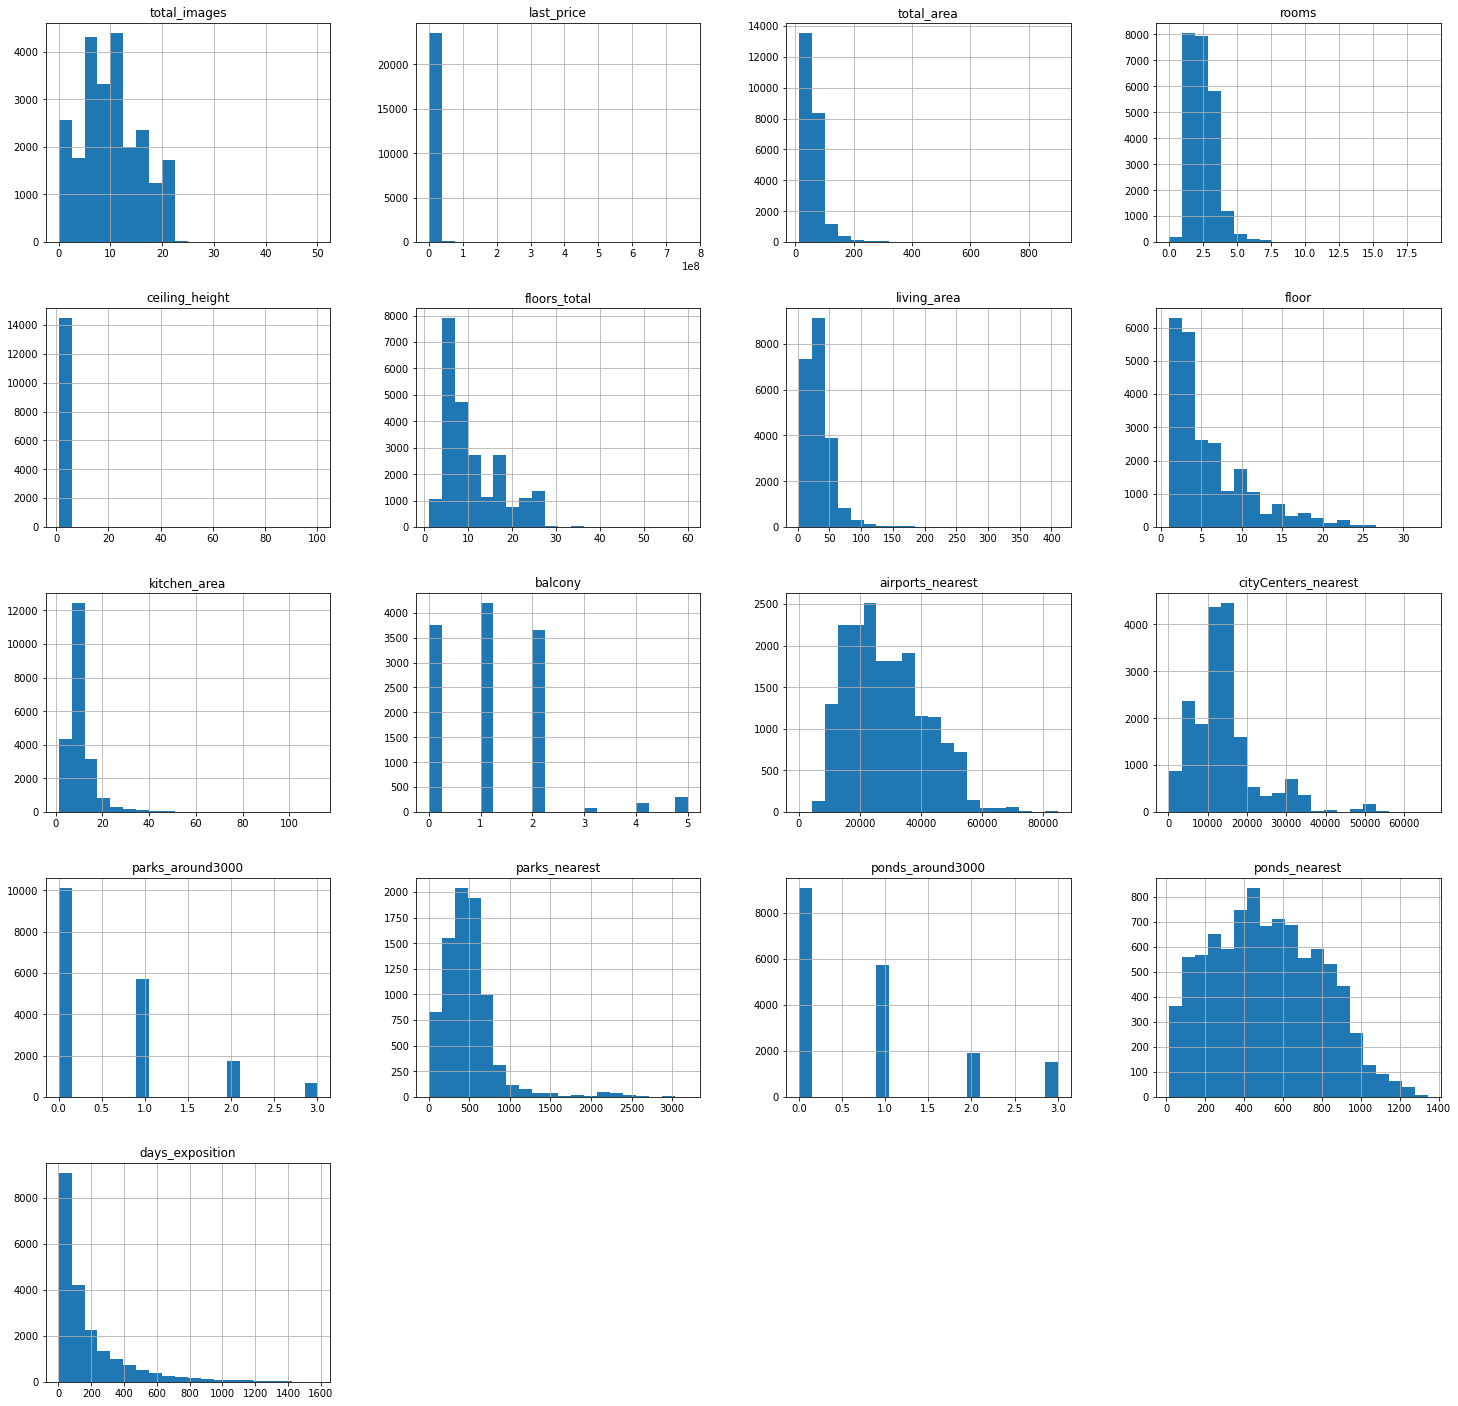

In [363]:
data.hist(bins=20, figsize=(25, 25));

На первый взгляд в графиках смущает аномально высокая цена, показатели площади: общая, жилая и площадь кухни (есть слишком большие значения, которые нужно проверить), высота потолков (до 30 м), количество этажей (до 60) и количество дней размещения объявления: значения от года и до 4-х лет (может ли столько времени висеть объявление, и квартира до сих пор не продана).

**На данном этапе мы:**

* привели названия столбцов к единому формату
* колонку first_day_exposition перевели в формат дата-время
* обработали пропуски в данных
* проверили аномальные значения и выбросы

### Предобработка данных

Приведем названия колонок к единому формату ("Змеиный").

In [364]:
data.rename(columns={
    'cityCenters_nearest':'city_centers_nearest',
    'parks_around3000':'parks_around_3000', 
    'ponds_around3000':'ponds_around_3000'}, inplace=True)

Проверим новые названия колонок.

In [365]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Поменяем типы данных в колонках.

In [366]:
# Приведем колонку first_day_exposition к типу datetime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

In [367]:
# Количество этажей приведем к целочисленным значениям

data['floors_total'] = data['floors_total'].astype(int, errors='ignore')

In [368]:
# Число балконов приведем к целочисленным значениям

data['balcony'] = data['balcony'].astype(int, errors='ignore')

In [369]:
# Количество дней экспозиции приведем к целочисленным значениям

data['days_exposition'] = data['days_exposition'].astype(int, errors='ignore')

In [370]:
# Посмотрим, что получилось

data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000         108           2019-03-07      3   
1             7     3350000          40           2018-12-04      1   
2            10     5196000          56           2015-08-20      2   
3             0    64900000         159           2015-07-24      3   
4             2    10000000         100           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0               3            16           51      8          NaN   False   
1             NaN            11           19      1          NaN   False   
2             NaN             5           34      4          NaN   False   
3             NaN            14          NaN      9          NaN   False   
4               3            14           32     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False            25      NaN  Санкт-Петербург             18863   
1      False            11        2   посёлок Шушары             12817   
2      False             8        0  Санкт-Петербург             21741   
3      False           NaN        0  Санкт-Петербург             28098   
4      False            41      NaN  Санкт-Петербург             31856   

   city_centers_nearest  parks_around_3000  parks_nearest  ponds_around_3000  \
0                 16028                  1            482                  2   
1                 18603                  0            NaN                  0   
2                 13933                  1             90                  2   
3                  6800                  2             84                  3   
4                  8098                  2            112                  1   

   ponds_nearest  days_exposition  
0            755              NaN  
1            NaN               81  
2            574              558  
3            234              424  
4             48              121

In [371]:
# print(data.head())

В таблице есть столбец с названиями населенных пунктов. В текствых значениях часто бывают дубликаты, проверим, как обстоят дела в данном случае.

In [372]:
# Найдем все явные дубликаты методом .duplicated()

data.duplicated().sum()

0

Явных дубликатов в таблице нет. Посмотрим на значения столбца locality_name. Выведем количество уникальных названий и их значения, отсортированные по возрастанию.

In [373]:
# Количество уникальных значений

len(data['locality_name'].unique())

365

In [374]:
# Уникальныезначения столбца locality_name, отсортированные по возрастанию

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Есть разные варианты названий. Приведем их к единым значениям.

Создадим функцию, которая будет заменять в заданном имени (name) некорректное значение (wrong_names) на корректное (correct_name).

In [375]:
def replace_wrong_names (name, wrong_names, correct_name):
    for wrong_name in wrong_names:
        if name.find(wrong_name) != -1:
            name = name.replace(wrong_name, correct_name)
    return name

Замены будем производить последовательно: сначала поселок, затем пгт, поселок при станции, Мурино (пгт), Любань (город).

Зменим "посёлок" на "поселок"

In [376]:
#Создадим список частей названий, которые мы хотим заменить. Переменной присвоим корректное значение.

wrong_names = ['посёлок']
correct_name = 'поселок'

In [377]:
# Воспользуемся функцией для замены

for item in data['locality_name'].unique():
    name = str(item)
    name = replace_wrong_names (name=name, wrong_names=wrong_names, correct_name=correct_name)
    data.loc[data['locality_name'] == item, 'locality_name'] = name

Заменим все варианты написания пгт на единое.

In [378]:
#Создадим список частей названий, которые мы хотим заменить. Переменной присвоим корректное значение.

wrong_names = ['поселок городского типа', 'городской поселок']
correct_name = 'пгт'

Переберем уникальные значения в колонке locality_name, последовательно присваивая их переменной name и меняя тип на str. Поскольку наша переменная теперь стала строкой, находим в ней части названий, которые нам не нравятся и заменяем их на нужные.

Затем ищем исходное некорректное значение в столбце locality_name и меняем на новое. 

In [379]:
for item in data['locality_name'].unique():
    name = str(item)
    name = replace_wrong_names (name=name, wrong_names=wrong_names, correct_name=correct_name)
    data.loc[data['locality_name'] == item, 'locality_name'] = name

Проверим, что получилось.

In [380]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

Меняем "поселок станции" и "поселок при железнодорожной станции" на "поселок".

In [381]:
wrong_names = ['поселок при железнодорожной станции', 'поселок станции']
correct_name = 'поселок'

In [382]:
for item in data['locality_name'].unique():
    name = str(item)
    name = replace_wrong_names (name=name, wrong_names=wrong_names, correct_name=correct_name)
    data.loc[data['locality_name'] == item, 'locality_name'] = name

Меняем "Мурино" и "поселок Мурино" на "пгт Мурино".

In [383]:
data.loc[(data['locality_name'] == 'Мурино')|((data['locality_name'] == 'поселок Мурино')), 'locality_name'] = 'пгт Мурино'

Меняем "поселок Любань" на "Любань", тк это город.

In [384]:
data.loc[(data['locality_name'] == 'поселок Любань'), 'locality_name'] = 'Любань'

Меняем "садоводческое некоммерческое товарищество" и "садовое товарищество" на "снт" для более краткой записи.

In [385]:
wrong_names = ['садоводческое некоммерческое товарищество', 'садовое товарищество']
correct_name = 'снт'

In [386]:
for item in data['locality_name'].unique():
    name = str(item)
    name = replace_wrong_names (name=name, wrong_names=wrong_names, correct_name=correct_name)
    data.loc[data['locality_name'] == item, 'locality_name'] = name

Меняем "Кудрово" на "деревня Кудрово".

In [387]:
data.loc[(data['locality_name'] == 'Кудрово'), 'locality_name'] = 'деревня Кудрово'

И посмотрим на общий результат. Выведем список уникальных названий локаций. И далее - их количество.

In [388]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Лодейное Поле', 'Ломоносов', 'Луга',
       'Любань', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
       'деревня Выскатка', 'деревня Гарболово

In [389]:
data.locality_name.nunique()

317

In [390]:
# Проверим теперь колчиество дубликатов

data.duplicated().sum()

0

Итого количество уникальных названий населенных пунктов стало 317. Мы заменили 48 дубликатов.

In [392]:
data[data.duplicated(subset=['total_area',  'first_day_exposition',
       'rooms', 'floors_total', 'floor', 'kitchen_area',
       'locality_name', 'city_centers_nearest'], keep=False)].sort_values(by='total_area')

# 'last_price',  'living_area', 'days_exposition'

total_images  last_price  total_area first_day_exposition  rooms  \
1809              6     5400000          69           2018-11-16      2   
18579             1     5400043          69           2018-11-16      2   
12376             3    18206548         140           2018-07-04      4   
23516             3    22529250         140           2018-07-04      4   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1809                3            22           36     16          NaN   False   
18579               3            22           36     16        False   False   
12376               3            16           83      9          NaN   False   
23516               3            16           83      9          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
1809       False            14      NaN       пгт Мурино               NaN   
18579      False            14      NaN       пгт Мурино               NaN   
12376      False            14      NaN  Санкт-Петербург             37434   
23516      False            14      NaN  Санкт-Петербург             37434   

       city_centers_nearest  parks_around_3000  parks_nearest  \
1809                    NaN                NaN            NaN   
18579                   NaN                NaN            NaN   
12376                  8460                  1            441   
23516                  8460                  1            441   

       ponds_around_3000  ponds_nearest  days_exposition  
1809                 NaN            NaN               24  
18579                NaN            NaN               20  
12376                  2            427              NaN  
23516                  2            427              266

2 Квартиры выставлены на продажу дважды, отличие только в цене и количестве дней размещения.
Оставим последние варианты - тк и по смыслу это мне кажется более целесообразным и данных там больше.

In [393]:
data.drop_duplicates(subset=['total_area',  'first_day_exposition',
       'rooms', 'floors_total', 'floor', 'kitchen_area',
       'locality_name', 'city_centers_nearest'], keep='last')['total_area'].count()

23697

2 строки удалились

Добавим жилую площадь в список подмножества.

In [394]:
data[data.duplicated(subset=['total_area', 'living_area', 'rooms', 'floors_total', 'floor', 'kitchen_area',
       'locality_name', 'city_centers_nearest'], keep=False)].sort_values(by='total_area')

total_images  last_price  total_area first_day_exposition  rooms  \
17659             2     2850000          30           2016-05-05      1   
22528             9     2950000          30           2018-09-14      1   
12873             5     2050000          31           2017-12-15      1   
8660              7     1850000          31           2018-03-17      1   
22696            15     1950000          34           2018-04-13      1   
...             ...         ...         ...                  ...    ...   
23516             3    22529250         140           2018-07-04      4   
16889            20    23290000         140           2016-08-04      3   
13343            20    15900000         140           2017-08-15      3   
23382             2    15000000         151           2016-07-04      4   
2276              2    12500000         151           2017-10-02      4   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
17659             NaN             9           15      4        False   False   
22528               2             9           15      4          NaN   False   
12873             NaN             5          NaN      2          NaN   False   
8660              NaN             5          NaN      2          NaN   False   
22696             NaN             7           18      6          NaN   False   
...               ...           ...          ...    ...          ...     ...   
23516               3            16           83      9          NaN   False   
16889               3             8           79      6          NaN   False   
13343             NaN             8           79      6          NaN   False   
23382               4             4           98      3          NaN   False   
2276                4             4           98      3          NaN   False   

       open_plan  kitchen_area  balcony        locality_name  \
17659      False             8        0         Красное Село   
22528      False             8      NaN         Красное Село   
12873      False           NaN      NaN               Выборг   
8660       False           NaN      NaN               Выборг   
22696      False             8      NaN  деревня Разметелево   
...          ...           ...      ...                  ...   
23516      False            14      NaN      Санкт-Петербург   
16889      False            18      NaN      Санкт-Петербург   
13343      False            18        0      Санкт-Петербург   
23382      False            24        0      Санкт-Петербург   
2276       False            24      NaN      Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around_3000  \
17659             27591                 31016                  0   
22528             27591                 31016                  0   
12873               NaN                   NaN                NaN   
8660                NaN                   NaN                NaN   
22696               NaN                   NaN                NaN   
...                 ...                   ...                ...   
23516             37434                  8460                  1   
16889             36998                  9189                  1   
13343             36998                  9189                  1   
23382             21204                  2180                  3   
2276              21204                  2180                  3   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
17659            NaN                  0            NaN              272  
22528            NaN                  0            NaN              106  
12873            NaN                NaN            NaN               39  
8660             NaN                NaN            NaN               45  
22696            NaN                NaN            NaN              193  
...              ...                ...            ...              ...  
23516            441                  2  

Получается 80 строк.

Тут есть объекты, объявление о продаже которых выставлено несколько раз с промежутком в несколько месяцев или пару лет. 
Я бы оставила последние варианты (keep='last'), как последний вариант, выставленный на продажу.

In [395]:
data.drop_duplicates(subset=['total_area', 'living_area', 'rooms', 'floors_total', 'floor', 'kitchen_area',
       'locality_name', 'city_centers_nearest'], keep='last')['total_area'].count()

23659

Перейдем к обработке пропущенных значений.

Узнаем количество пропусков в каждой колонке.

In [398]:
# Текст по оси Y без наклона

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Доля пропущенных данных' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

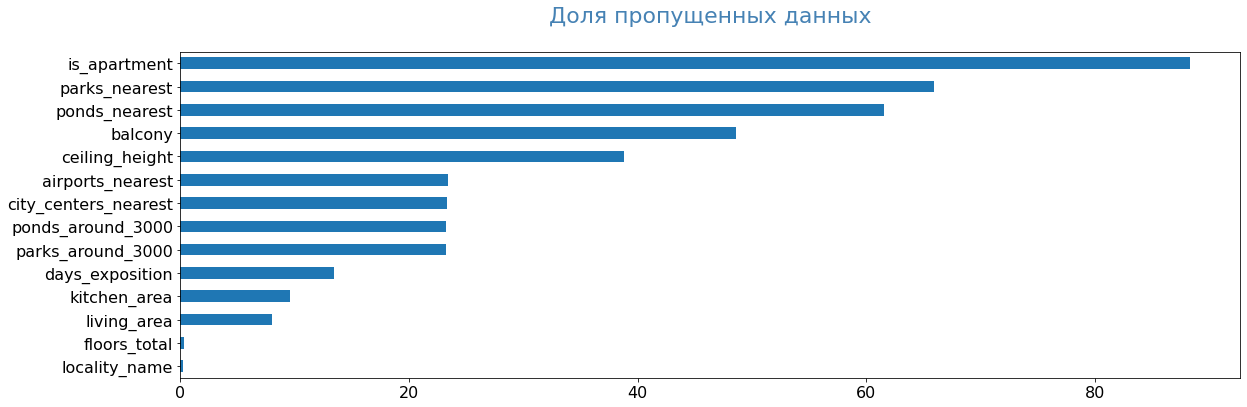

In [399]:
pass_value_barh(data)

In [400]:
# Сделаем красивую табличку

data.isna().sum().to_frame()

0
total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height         9195
floors_total             86
living_area            1903
floor                     0
is_apartment          20924
studio                    0
open_plan                 0
kitchen_area           2278
balcony               11519
locality_name            49
airports_nearest       5542
city_centers_nearest   5519
parks_around_3000      5518
parks_nearest         15620
ponds_around_3000      5518
ponds_nearest         14589
days_exposition        3181

Пропуски в колонках:
* floors_total
* locality_name

заменить мы не сможем, оставим их как есть. 

Количество их крайне мало и не должно повлиять на результаты (0,36% и 0,21% от общего объема данных соотвественно).
Могу предположить, что количество этажей не указано в одноэтажных домах.

Пропуски в колонке:
* days_exposition

составляют 13,4%. Это довольно много, но эти данные мы не можем ничем заменить. Придется оставить пропуски.

Пропуски в колонках с указанием расстояния до ближайших аэропорта, парка и пруда, и до центра города:
* airports_nearest
* parks_nearest
* ponds_nearest
* parks_around_3000
* ponds_around_3000

вероятно, эти объекты находятся достаточно далеко, чтобы отмечать расстояние. Отметим, что количество пропусков примерно одинаковое по аэропорту, центру города, паркам и прудам в радиусе 3 км. Вероятно, это квартиры в пригородах СПб.

Также похожие цифры пропусков по ближайшим паркам и прудам - скорее всего тоже пригороды, равноудаленные от этих объектов.

Если заменим пропуск на 0, получится, что объекты расположены рядом, но это не так. Поэтому также оставим пропуски.

Можно предположить, что пропуски в колонках:

* is_apartment - это обычные квартиры (не апартаменты)
* balcony - в квартире нет балкона

Посмотрим, какие значения есть в этих колонках. Заменим отсутсвующие значения на 0 или False, соответственно.

Пропуски в колонках:
* living_area
* kitchen_area
* ceiling_height

Жилая площадь обычно коррелирует с общей площадью. Посмотрим, можно ли заменить пропуски средними или медианными значениями.

Возможно, стоит также учесть населенный пункт и этажность зданий при заполнении этих данных. В локации СПб также стоит учесть удаленность от центра города - поскольку город имеет долгую историю, продолжительный период застройки, т.о. параметры зданий разные.

Площадь кухни и высота потолков, возможно имеют некоторую зависимость от общей площади и этажности, соответственно. Если это так, то можно попробовать заменить средними или медианными значениями. Однако, для более точного ответа стоит рассмотреть эти параметры более детально.

Пропуски в колонке: 
* city_centers_nearest

попробуем заменить средним значением по аналогичным локациям. Оставшиеся пропуски можно попробовать заменить на основе данных о населенных пунктах Ленинградской области.

Итак, заменим пропуски, там, где это возможно.

 Колонка is_apartment.

In [401]:
# Посмотрим, какие есть уникальные значения.

data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [402]:
# Посмотрим количество таких объектов

data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Количество апартаментов за рассматриваемый период (2014 - 2019 гг.) крайне незначительно. Между тем, в 2018–2019 годах на первичном рынке СПб продавалось по 4,3–4,9 тыс. апартаментов в год. Этот вид объектов недвижимости приобретает все большую популярность. Стоимость апартаментов ниже, чем у жилой недвижимости. В СПб окло 83% апартаментов - это студии.

In [403]:
# Посмотрим, кстати и количество студий (по ним все данные заполнены)

data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Студий тоже довольно мало.

В нашем случае, мы не можем быть уверены, что незаполненные данные в колонке is_apartment - это не апартаменты.
С другой стороны количество студий сопоставимо. 

в целом, показатель is_apartment для данного анализа не критический, поэтому, оставим пропуски, на всякий случай будет часть значений, по которым точно известно, что это не апартаменты.

In [404]:
# Заменим пропуски на False (те "не апартаменты")

#data['is_apartment'] = data['is_apartment'].fillna(False)

In [405]:
#data['is_apartment'].isna().sum()

Колонка balcony.

In [406]:
# Выведем все уникальные значения.

data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [407]:
# Заменим пропуски на ноль (балкон отсутствует)

data['balcony'] = data['balcony'].fillna(0)

Проверим значения и количество пропусков в этой колонке после замены.

In [408]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [409]:
data['balcony'].isna().sum()

0

Перейдем к показателям площади.

Определим масштаб бедствия (процент пропусков).

In [410]:
# Для living_area

(data['living_area'].isna().sum() / data.shape[0]).round(4)*100

8.03

In [411]:
# Для kitchen_area

(data['kitchen_area'].isna().sum() / data.shape[0]).round(4)*100

9.610000000000001

In [412]:
# Для ceiling_height

(data['ceiling_height'].isna().sum() / data.shape[0]).round(4)*100

38.800000000000004

Рассмотрим пропуски в колонке living_area.

Поскольку число студий и апартаментов крайне мало, а в нормальных квартирах есть некоторая зависимость жилой площади и площади кухни от общей площади, попробую заменить пропуски с учетом коэффициента: отношение жилой к общей и отношение кухни к общей площади. Медиана - чтобы избежать влияния выбросов.

Поскольку в наших данных оказался неожиданный подвох, проверим сначала, что 90% общей площади меньше или равно сумме жилой площади и площади кухни.

In [413]:
# Создадим функцию, которая присвоит признак 1 - если площадь уже некорректна
# и 0 - если площадь на данный момент корректна

def incorrect_area (row):
    total_area = row['total_area']
    living_area = row['living_area']
    kitchen_area = row['kitchen_area']
    if total_area * 0.9 <= living_area + kitchen_area:
        return 1
    return 0

In [414]:
# Применим функцию к таблице, ко всем строкам

data['incorrect_area'] = data.apply(incorrect_area, axis=1)

In [415]:
data['incorrect_area'].value_counts()

0    23224
1      475
Name: incorrect_area, dtype: int64

In [416]:
# Посчитаем, сколько таких строк

data.query('incorrect_area == 1')['incorrect_area'].count()

475

In [417]:
# Сколько % составляют некорректные данные

data.query('incorrect_area == 1')['incorrect_area'].count() / data.shape[0]*100

2.004303979070847

Мне кажется, стоит взять информацию, которая заполнена правильно. 
Оставим объекты с корректной площадью. И удалим колонку с признаком.

In [418]:
data = data.query('incorrect_area == 0').drop('incorrect_area', axis=1)

In [419]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23224 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23224 non-null  int64         
 1   last_price            23224 non-null  float64       
 2   total_area            23224 non-null  float64       
 3   first_day_exposition  23224 non-null  datetime64[ns]
 4   rooms                 23224 non-null  int64         
 5   ceiling_height        14198 non-null  float64       
 6   floors_total          23139 non-null  float64       
 7   living_area           21321 non-null  float64       
 8   floor                 23224 non-null  int64         
 9   is_apartment          2712 non-null   object        
 10  studio                23224 non-null  bool          
 11  open_plan             23224 non-null  bool          
 12  kitchen_area          20946 non-null  float64       
 13  balcony         

А теперь попробуем применить мой новый подход к заполнению пропусков в жилой площади.

Перейдем к пропускам в жилой площади. Поскольку в прошлой версии мы выяснили, что четкой прямой зависимости нет, а очень хочется собрать именно массив параметров, воспользуемся группировкой и трансформацией.

Для начала рассмотрим максимальный спектр параметров: 'locality_name', 'total_area', 'city_centers_nearest'

In [420]:
# Создадим переменную, 
# которая рассчитает долю медианного значения жилой площади в медианном значении общей площади
# с учетом группировки по 3м параметрам

rate_per_locality_ta_distance = data.groupby(
    ['locality_name', 'total_area', 'city_centers_nearest']
)['living_area'].transform(
    'median') / data.groupby(
    ['locality_name', 'total_area', 'city_centers_nearest']
)['total_area'].transform(
    'median')

In [421]:
# И заполним пропуски в жилой площади данными из предыдущего расчета

data['living_area'] = data['living_area'].fillna(rate_per_locality_ta_distance*data['total_area'])

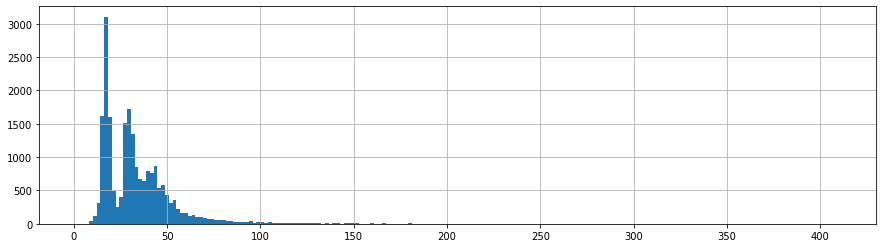

In [422]:
# Проверим, как выглядит распределение сейчас

data['living_area'].hist(bins=200, figsize=(15,4));

Вид гистограммы не изменился

In [423]:
# Посмотрим, сколько осталось пропусков

data['living_area'].isna().sum()

1840

In [424]:
# Попробуем дальше заполнить пропуски, но уже без учета расстояния до центра

rate_per_locality_ta = data.groupby(
    ['locality_name', 'total_area']
)['living_area'].transform(
    'median') / data.groupby(
    ['locality_name', 'total_area']
)['total_area'].transform(
    'median')

In [425]:
data['living_area'] = data['living_area'].fillna(rate_per_locality_ta*data['total_area'])

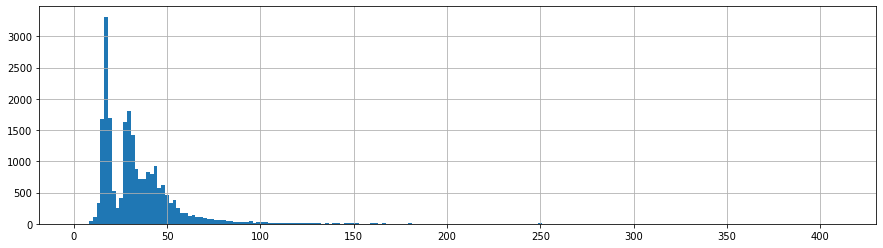

In [426]:
# Проверим распределение

data['living_area'].hist(bins=200, figsize=(15,4));

In [427]:
# Количество пропусков

data['living_area'].isna().sum()

555

In [428]:
# И попробуем заменить еще немного пропусков, исходя только из населенного пункта

rate_per_locality = data.groupby(
    ['locality_name']
)['living_area'].transform(
    'median') / data.groupby(
    ['locality_name']
)['total_area'].transform(
    'median')

In [429]:
data['living_area'] = data['living_area'].fillna(rate_per_locality*data['total_area'])

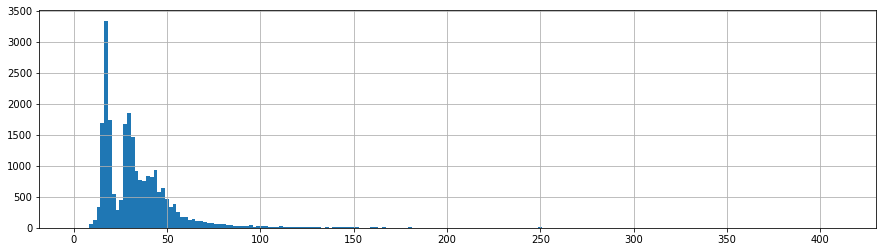

In [430]:
data['living_area'].hist(bins=200, figsize=(15,4));

In [431]:
# Количество оставшихся пропусков

data['living_area'].isna().sum()

22

In [432]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9026
floors_total               85
living_area                22
floor                       0
is_apartment            20512
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5412
city_centers_nearest     5389
parks_around_3000        5388
parks_nearest           15320
ponds_around_3000        5388
ponds_nearest           14297
days_exposition          3102
dtype: int64

Число пропуско в жилой площади значительно снизилось. А общий вид гистограммы, на мой взгляд, не изменился (по крайней мере, значительно).

Теперь посмотрим, не возникло ли новых аномалий в площадях

In [433]:
data.query('total_area * 0.9 <= living_area + kitchen_area')['total_area'].count()

42

In [434]:
# В каких населенных пунктах они расположены

data.query(
    'total_area * 0.9 <= living_area + kitchen_area'
).groupby(
    'locality_name'
)['total_area'].agg(
    'count'
).sort_values(
    ascending=False
)

locality_name
Санкт-Петербург    30
Выборг              3
Луга                3
Кириши              2
Коммунар            2
Красное Село        1
поселок Аннино      1
Name: total_area, dtype: int64

Пожалуй, от этих данных придется тоже избавиться

In [435]:
# Создадим колонку с признаком некорректной площади

data['incorrect_area'] = data.apply(incorrect_area, axis=1)

In [436]:
# Проверим количество, чтобы не удалить лишнего

data['incorrect_area'].value_counts()

0    23182
1       42
Name: incorrect_area, dtype: int64

In [437]:
# Оставим только подходящие значения

data = data.query('incorrect_area == 0').drop('incorrect_area', axis=1)

In [438]:
# Объем оставшихся данных:

rest_data(data)

97.82

Теперь, я думаю, стоит попробовать убрать пропуски в площади кухни, аналогичным образом.

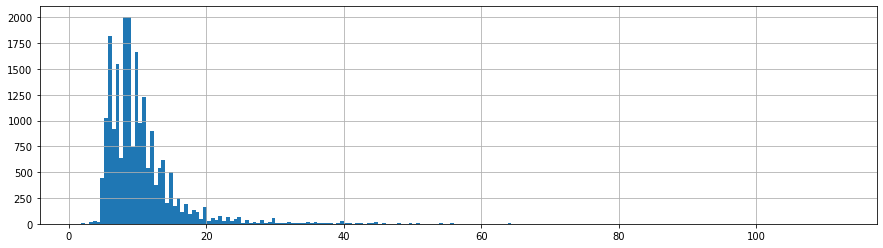

In [439]:
# Посмотрим на распределение данных в начале

data['kitchen_area'].hist(bins=200, figsize=(15,4));

In [440]:
# Создадим переменную, 
# которая рассчитает долю медианного значения площади кухни в медианном значении общей площади
# с учетом группировки по 3м параметрам

rate_per_locality_ta_distance = data.groupby(
    ['locality_name', 'total_area', 'city_centers_nearest']
)['kitchen_area'].transform(
    'median') / data.groupby(
    ['locality_name', 'total_area', 'city_centers_nearest']
)['total_area'].transform(
    'median')

In [441]:
# И заполним пропуски в площади кухни данными из предыдущего расчета

data['kitchen_area'] = data['kitchen_area'].fillna(rate_per_locality_ta_distance*data['total_area'])

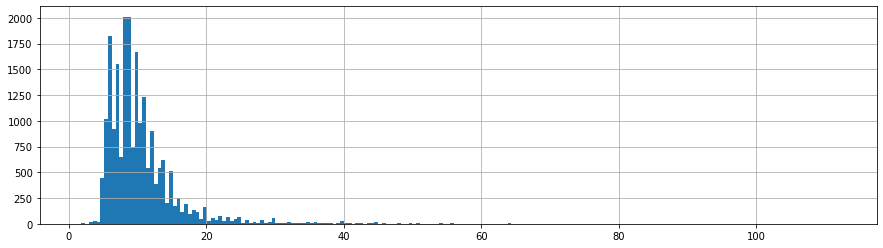

In [442]:
# Проверим, как выглядит распределение

data['kitchen_area'].hist(bins=200, figsize=(15,4));

In [443]:
# Посмотрим, сколько осталось пропусков

data['kitchen_area'].isna().sum()

2210

In [444]:
# Попробуем дальше заполнить пропуски, но уже без учета расстояния до центра

rate_per_locality_ta = data.groupby(
    ['locality_name', 'total_area']
)['kitchen_area'].transform(
    'median') / data.groupby(
    ['locality_name', 'total_area']
)['total_area'].transform(
    'median')

In [445]:
data['kitchen_area'] = data['kitchen_area'].fillna(rate_per_locality_ta*data['total_area'])

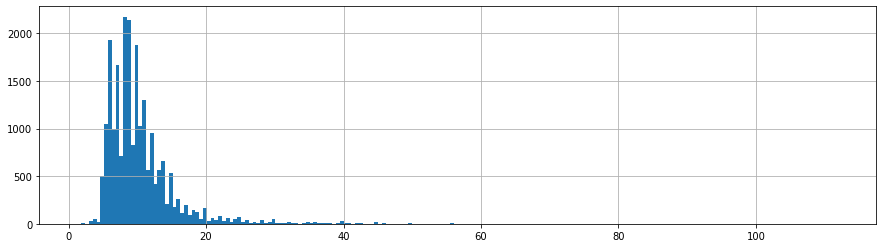

In [446]:
# Проверим распределение

data['kitchen_area'].hist(bins=200, figsize=(15,4));

Есть небольшие изменения около 5 и 10 кв.м. Но в целом, мне кажется получается адекватно.

In [447]:
# Количество пропусков

data['kitchen_area'].isna().sum()

700

In [448]:
# И исходя только из населенного пункта

rate_per_locality = data.groupby(
    ['locality_name']
)['kitchen_area'].transform(
    'median') / data.groupby(
    ['locality_name']
)['total_area'].transform(
    'median')

In [449]:
data['kitchen_area'] = data['kitchen_area'].fillna(rate_per_locality*data['total_area'])

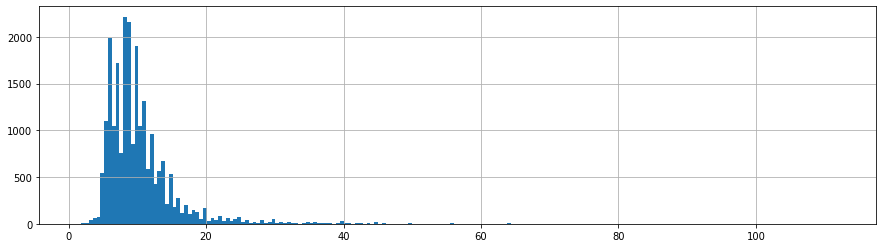

In [450]:
# Проверим распределение

data['kitchen_area'].hist(bins=200, figsize=(15,4));

In [451]:
# Количество пропусков

data['kitchen_area'].isna().sum()

28

In [452]:
# Проверим аномалии

data.query('total_area * 0.9 <= living_area + kitchen_area')['total_area'].count()

248

In [453]:
data.query('total_area * 0.9 <= living_area + kitchen_area')

total_images  last_price  total_area first_day_exposition  rooms  \
237               4     2438033          28           2016-11-23      1   
349               4     2320000          25           2017-09-27      0   
424              14    11500000          98           2016-05-10      3   
440               8     2480000          27           2018-03-12      0   
508               0     3375000          34           2017-03-28      0   
...             ...         ...         ...                  ...    ...   
23191             3     1900000          19           2016-04-04      1   
23420             1     3345000          30           2018-08-09      1   
23442             0     2500000          28           2017-09-28      0   
23511             6     4780000          42           2016-04-26      1   
23579             7     2350000          25           2018-06-07      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
237               NaN           NaN           21      1          NaN   False   
349               NaN            14           17      1          NaN   False   
424                 3             3           88      3        False   False   
440               NaN            17           25      4          NaN    True   
508               NaN            26           24     19          NaN   False   
...               ...           ...          ...    ...          ...     ...   
23191             NaN            16           16     12          NaN   False   
23420             NaN            27           20      3          NaN   False   
23442             NaN            24           18      4          NaN   False   
23511               3            10           28      3        False   False   
23579             NaN            10           18      2          NaN   False   

       open_plan  kitchen_area  balcony      locality_name  airports_nearest  \
237        False             6        0    Санкт-Петербург             22041   
349         True             7        0    деревня Кудрово               NaN   
424        False            14        1    Санкт-Петербург             39363   
440        False             5        2    Санкт-Петербург             38171   
508         True             9        1  поселок Парголово             53115   
...          ...           ...      ...                ...               ...   
23191      False             3        0              Тосно               NaN   
23420      False             8        1  поселок Парголово             52912   
23442       True             8        2         пгт Мурино               NaN   
23511      False            11        2    Санкт-Петербург             24281   
23579      False             6        0    деревня Кудрово               NaN   

       city_centers_nearest  parks_around_3000  parks_nearest  \
237                   17369                  0            NaN   
349                     NaN                NaN            NaN   
424                   13270                  0            NaN   
440                   15015                  0            NaN   
508                   19292                  0            NaN   
...                     ...                ...            ...   
23191                   NaN                NaN            NaN   
23420                 19089                  0            NaN   
23442                   NaN                NaN            NaN   
23511                  5908                  1           1270   
23579                   NaN                NaN            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
237                    1            374              251  
349                  NaN            NaN               45  
424                    0            NaN               90  
440                    2            982               64  
508                    1            593              430  
...                  ...            ...          

In [454]:
# В каких населенных пунктах они расположены

data.query(
    'total_area * 0.9 <= living_area + kitchen_area'
).groupby(
    'locality_name'
)['total_area'].agg(
    'count'
).sort_values(
    ascending=False
)

locality_name
Санкт-Петербург            122
пгт Мурино                  43
деревня Кудрово             34
Луга                        11
поселок Бугры                7
Всеволожск                   5
Никольское                   5
поселок Шушары               2
поселок Парголово            2
деревня Новое Девяткино      2
деревня Сяськелево           1
поселок Мичуринское          1
пгт имени Свердлова          1
пгт Токсово                  1
пгт Новоселье                1
деревня Куттузи              1
деревня Старые Бегуницы      1
Коммунар                     1
деревня Бор                  1
Тосно                        1
Сертолово                    1
Пушкин                       1
Отрадное                     1
Кронштадт                    1
село Паша                    1
Name: total_area, dtype: int64

In [455]:
# Создадим колонку с признаком некорректной площади

data['incorrect_area'] = data.apply(incorrect_area, axis=1)

In [456]:
# Проверим количество

data['incorrect_area'].value_counts()

0    22934
1      248
Name: incorrect_area, dtype: int64

In [457]:
# Оставим только подходящие значения

data = data.query('incorrect_area == 0').drop('incorrect_area', axis=1).reset_index()

In [458]:
# Объем оставшихся данных:

rest_data(data)

96.77

In [459]:
# выведем информацию после обработки

data.isna().sum().to_frame()

0
index                     0
total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height         8861
floors_total             82
living_area              22
floor                     0
is_apartment          20256
studio                    0
open_plan                 0
kitchen_area             28
balcony                   0
locality_name            49
airports_nearest       5280
city_centers_nearest   5257
parks_around_3000      5256
parks_nearest         15096
ponds_around_3000      5256
ponds_nearest         14108
days_exposition        3075

Осталась еще одна колонка со значительным количеством пропусков - высота потолков. Эти данные мы рассмотрим в след.пункте, поскольку число пропусков значительно и явно есть аномалии в этих данных.

**Вывод:**

На данном этапе мы провели ряд важных преобразований: привели названия колонок к единому формату, преобразовали тип данных в нескольких колонках, узначли количество пропусков в таблице и постарались корректно заполнить их данными.

### Посчитайте и добавьте в таблицу новые столбцы

Добавим колонку с ценой одного квадратного метра (стоимость объекта поделить на его общую площадь, результат округлить до двух знаков после запятой).

In [461]:
data['price_1_sqm'] = round(data['last_price'] / data['total_area'], 2)

Добавим в новую колонку день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

In [462]:
data['day_exposition_num'] = data['first_day_exposition'].dt.weekday

Добавим в новую колонку месяц публикации объявления

In [463]:
data['month_exposition_num'] = data['first_day_exposition'].dt.month

Добавим в новую колонку год публикации объявления

In [464]:
data['year_exposition_num'] = data['first_day_exposition'].dt.year

In [465]:
#data.info()

Добавим в новую колонку тип этажа квартиры (значения — «первый», «последний», «другой»).

Для этого создадим функцию, которую затем применим к таблице.

In [466]:
def floor_category (row):
    floor = row['floor']
    last_floor = row['floors_total']
    if floor > 0 and last_floor >0 :         # <---Исправление
        if floor == 1:
            return 'первый'
        elif floor == last_floor:
            return 'последний'
        else:
            return 'другой'
    else:                                   # <---Исправление
        return 'Некорректное значение'      # <---Исправление 

In [467]:
# Добавим столбец в таблицу, используя функцию

data['floor_category'] = data.apply(floor_category, axis=1)

In [468]:
data['floor_category'].value_counts()

другой                   16848
последний                 3203
первый                    2801
Некорректное значение       82
Name: floor_category, dtype: int64

In [469]:
# Изменим тип данных в новой колонке на категориальный

data['floor_category'] = data['floor_category'].astype('category')

Добавим в новую колонку расстояние до центра города в километрах (км, округленные до ближайших целых значений)

In [470]:
data['city_centers_km'] = round(data['city_centers_nearest']/ 1000)

In [471]:
#data.head(15)

### Проведите исследовательский анализ данных

#### Основные параметры объектов недвижимости.

Рассмотрим последовательно основные параметры объектов неджимости:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего парка

узнаем их основные характеристики, построим гистограммы, диаграммы размаха, найдем диапазон нормальных значений, аномальные данные и выбросы.

##### Общая площадь

Выведем описание этой колонки.

In [472]:
data['total_area'].describe()

count   22934
mean       60
std        36
min        13
25%        40
50%        52
75%        70
max       900
Name: total_area, dtype: float64

Минимальное значение = 12 кв.м., максимальное = 900 кв.м. Четверть квартир имеет площадь до 40 кв.м., среднее значение = 60, 75% квартир имеет площадь до 70 кв.м. Допустим, микро-квартиры сейчас набирают популярность, но квартира с площадью 900 кв.м. явная аномалия.

Построим гистограмму, чтобы увидеть распределение данных. Зададим минимальное и максимальное значения из предыдущего пункта.

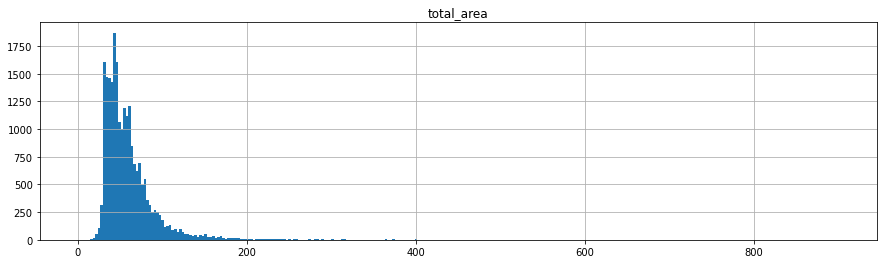

In [473]:
data.hist('total_area', bins=300, range=(0, 900), figsize=(15, 4));

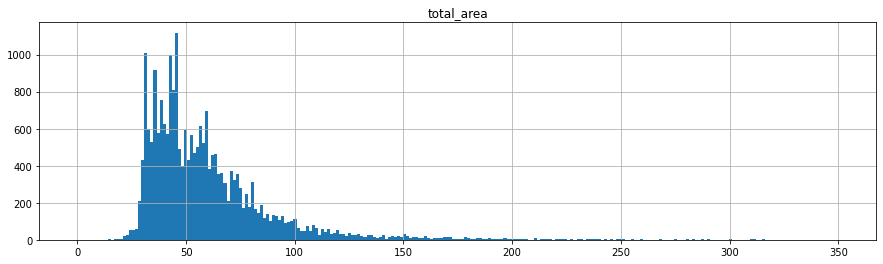

In [474]:
data.hist('total_area', bins=250, range=(0, 350), figsize=(15, 4));

При значениях площади от 200 до 300 начинаются прерывистые значения.
Посмотрим, как выглядит распределение квартир площадью более 200 кв.м. в наших данных.

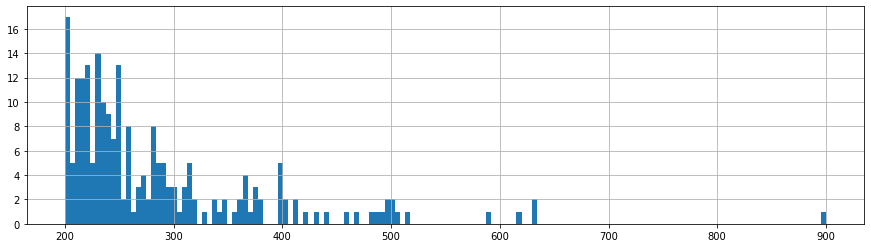

In [475]:
data.query('total_area >= 200')['total_area'].hist(bins=150, figsize=(15,4));

Найдем число квартир с площадью больше 250 кв.м

In [476]:
data[(data['total_area'] > 250)]['total_area'].count()

107

Согласно данным о рынке недвижимости, квартиры в элитных жилых клмплексах могут иметь общую площадь до 250 кв.м. 
Квартиры с общей площадью 300-400 кв.м. встречается крайне редко. А больше 400, если и есть , то совсем уж уникальный объект.

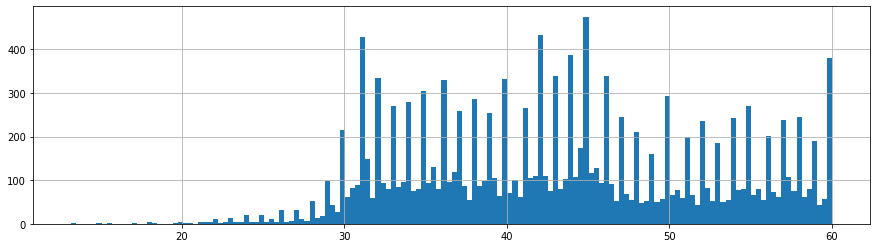

In [477]:
# Посмотрим на левую часть - минимальные площади

data.query('total_area <= 60')['total_area'].hist(bins=150, figsize=(15,4));

Тут хорошо видно типовые квартиры - наиболее частые объектына гистограмме.

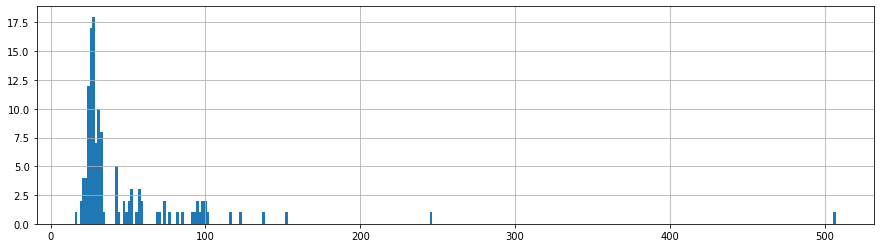

In [478]:
# Посмотрим, где в этих данных квартиры-студии и апартаменты

data.query('(studio ==True or is_apartment == True)')['total_area'].hist(bins=300, figsize=(15,4));

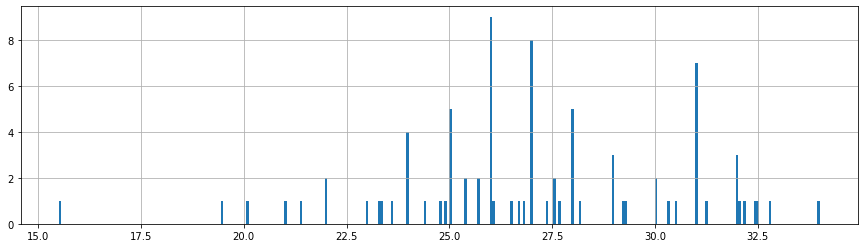

In [479]:
data.query('(studio ==True or is_apartment == True) and total_area<=40')['total_area'].hist(bins=300, figsize=(15,4));

Построим диаграмму размаха по общей площади.

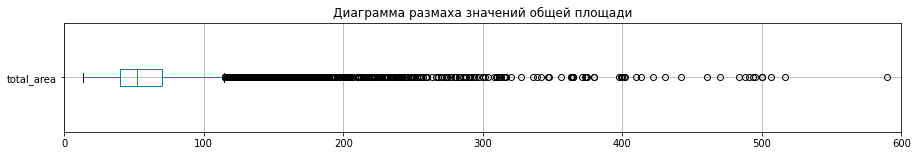

In [481]:
fig, ax = plt.subplots(figsize = (15,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений общей площади')
ax.set_xlim(0,600);

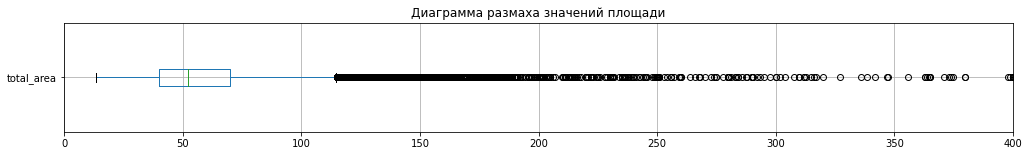

In [482]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

Здесь, пожалуй, мы начнем отбирать объекты для анализа - без выбросов.

В случае с общей площадью - от  до 250 кв.м.

In [483]:
good_data = data.query('20 <= total_area <= 250')

In [484]:
rest_data(good_data)

96.27

##### Жилая площадь

Выведем описание этой колонки.

In [485]:
good_data['living_area'].describe()

count   22793
mean       34
std        19
min         2
25%        19
50%        30
75%        42
max       184
Name: living_area, dtype: float64

Построим гистограмму, чтобы увидеть распределение данных.

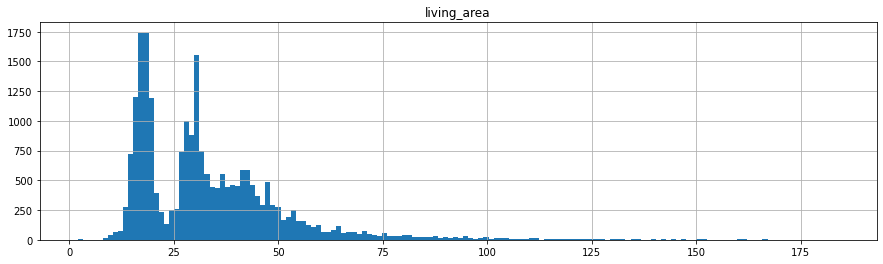

In [486]:
good_data.hist('living_area', bins=150, figsize=(15, 4));

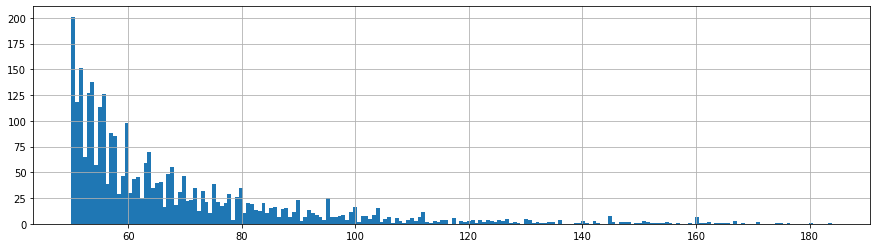

In [487]:
# Правая часть графика - большие данные

good_data.query('living_area >=50')['living_area'].hist(bins=200, figsize=(15,4));

От 120 примерно кв.м. данные становятя не стабильными.

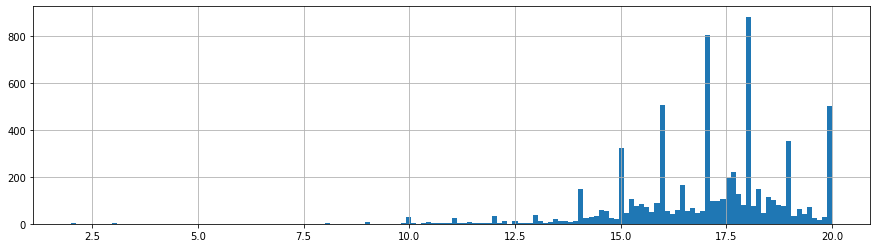

In [488]:
# Левая часть графика

good_data.query('living_area <= 20')['living_area'].hist(bins=150, figsize=(15,4));

Тут тоже хорошо видно типовые квартиры. 

Построим диаграмму размаха по жилой площади.

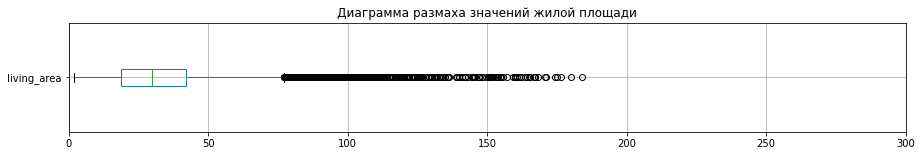

In [490]:
fig, ax = plt.subplots(figsize = (15,2))
ax = good_data[['living_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений жилой площади')
ax.set_xlim(0, 300);

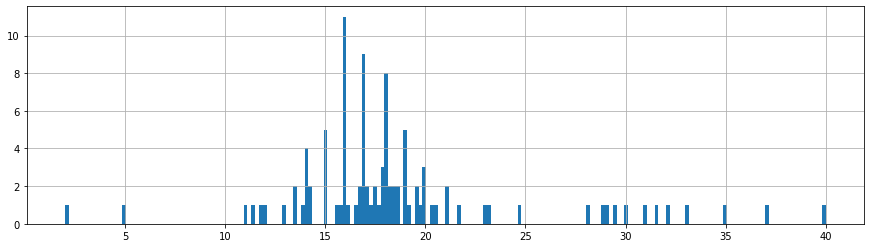

In [491]:
# Студии ) просто любопытно ))
good_data.query('(studio ==True or is_apartment == True) and living_area <= 40')['living_area'].hist(bins=200, figsize=(15,4));

Есть один вариант студии, который на больших данных четко выделяется:

In [492]:
data.query('(studio ==True or is_apartment == True) and living_area >=250')

index  total_images  last_price  total_area first_day_exposition  rooms  \
7773   8018            20    84000000         507           2015-12-17      5   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
7773               4             7          302      7         True   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
7773      False            46        1  Санкт-Петербург               NaN   

      city_centers_nearest  parks_around_3000  parks_nearest  \
7773                  5735                  2            110   

      ponds_around_3000  ponds_nearest  days_exposition  price_1_sqm  \
7773                  0            NaN             1078       165680   

      day_exposition_num  month_exposition_num  year_exposition_num  \
7773                   3                    12                 2015   

     floor_category  city_centers_km  
7773      последний                6

Студия 507 кв. м, жилой площадью 302, 84 млн.. Была продана за 1 день. Какой показатель не возьми - все уникальные. 

In [493]:
# Зададим новое условие для нашей выборки

good_data = good_data.query('10 <= living_area <= 120')

In [494]:
rest_data(good_data)

95.54

##### Площадь кухни

Выведем описание этой колонки.

In [495]:
good_data['kitchen_area'].describe()

count   22634
mean       10
std         5
min         1
25%         7
50%         9
75%        12
max       107
Name: kitchen_area, dtype: float64

Построим гистограмму.

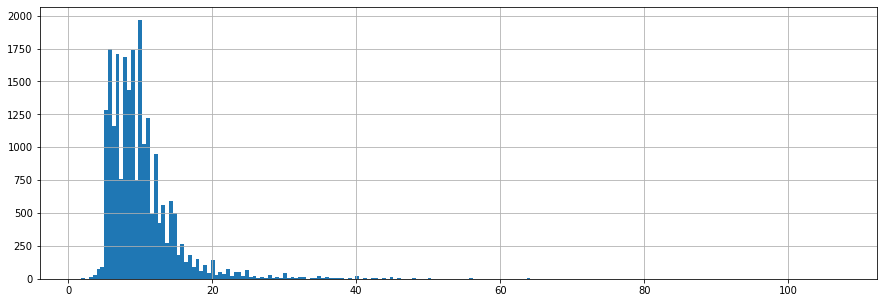

In [496]:
good_data['kitchen_area'].hist(bins=200, figsize=(15,5));

Посмотрим по порядку на большие и малые значения параметра.

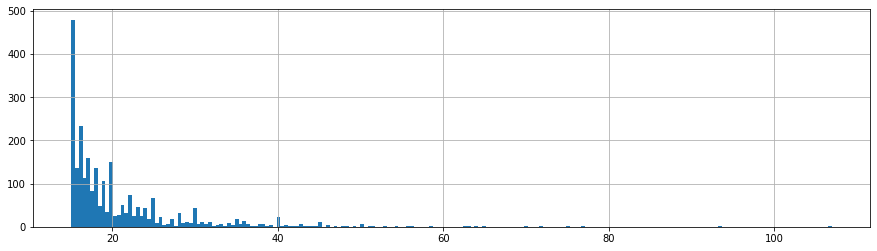

In [497]:
good_data.query('kitchen_area >=15')['kitchen_area'].hist(bins=200, figsize=(15,4));

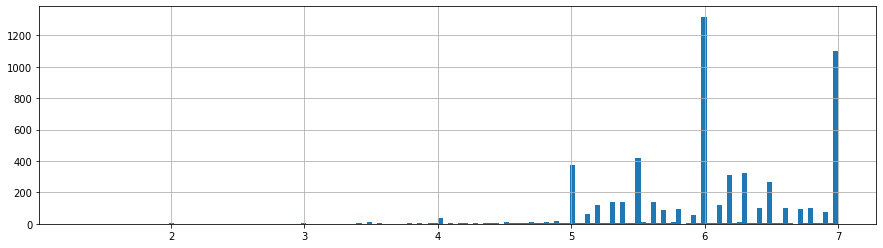

In [498]:
good_data.query('kitchen_area <= 7')['kitchen_area'].hist(bins=150, figsize=(15,4));

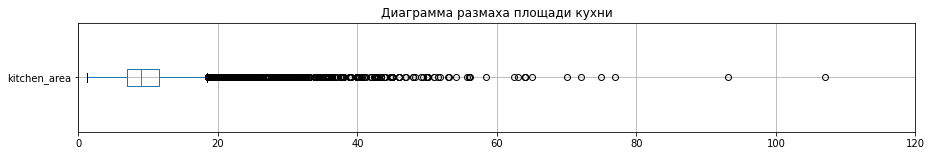

In [499]:
# Диаграмма размаха 

fig, ax = plt.subplots(figsize = (15,2))
ax = good_data[['kitchen_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха площади кухни')
ax.set_xlim(0, 120);

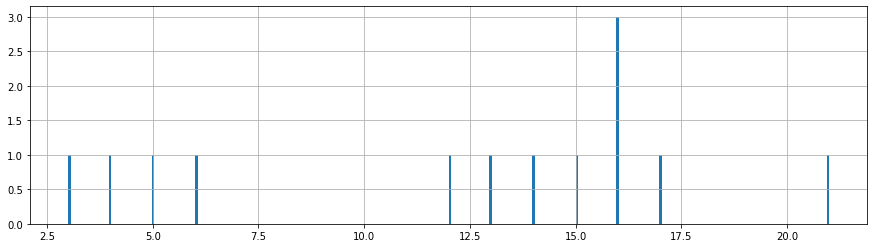

In [500]:
# Где территориально находятся самые маленькие кухни - меньше 3 кв.м.

good_data.query('kitchen_area <=3')['city_centers_km'].hist(bins=300, figsize=(15,4));

Тут лидирует 16й км от центра, и за ним 5й

In [501]:
# Зададим новое условие для нашей выборки

good_data = good_data.query('5 <= kitchen_area <= 45')

In [502]:
rest_data(good_data)

94.45

##### Стоимость объекта

Выведем описание данных

In [503]:
good_data['last_price'].describe()

count       22384
mean      5990338
std       5945981
min         12190
25%       3480000
50%       4650000
75%       6700000
max     330000000
Name: last_price, dtype: float64

Построим гистограмму по этому параметру.

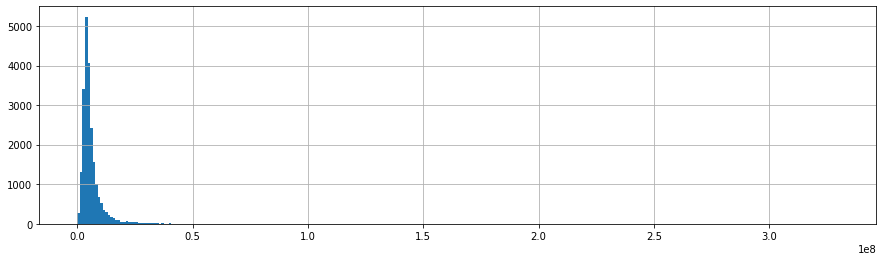

In [504]:
good_data['last_price'].hist(bins=300, figsize=(15,4));

Здесь есть несколько единичных объектов с экстремально высокой стоимостью.

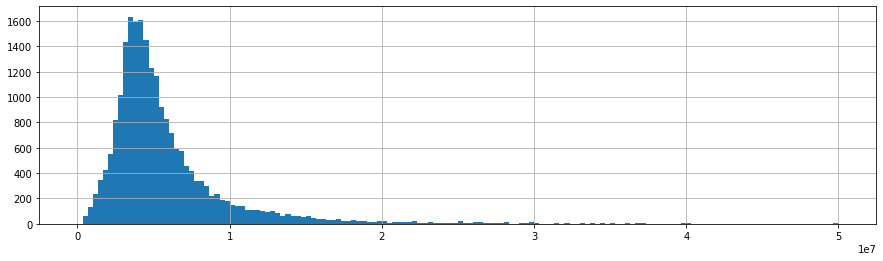

In [505]:
# Ограничим верхний предел стоимости

good_data['last_price'].hist(bins=150, range=(0, 50000000),figsize=(15,4));

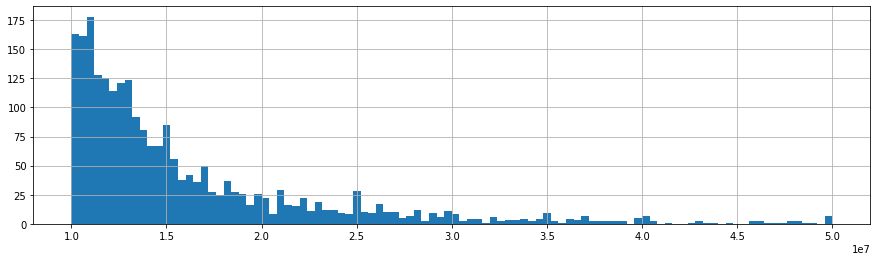

In [506]:
# Объекты с максимальной стоимостью

good_data['last_price'].hist(bins=100, range=(10000000, 50000000),figsize=(15,4));

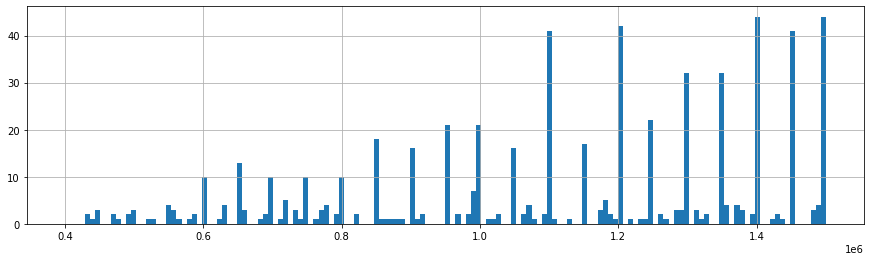

In [507]:
# Объекты с минимальной стоимостью

good_data['last_price'].hist(bins=150, range=(400000, 1500000),figsize=(15,4));

Тут можно сказать, что люди любят "круглые" цифры

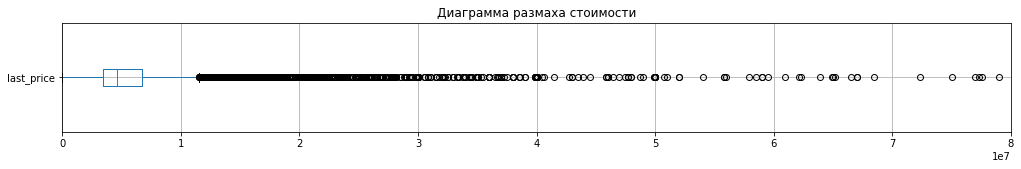

In [508]:
# Диаграмма размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = good_data[['last_price']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха стоимости')
ax.set_xlim(0, 80000000);

In [509]:
# Зададим новое условие для нашей выборки

good_data = good_data.query('600000 <= last_price <= 30000000')

In [510]:
rest_data(good_data)

93.69

##### Количество комнат

Выведем описание данных

In [511]:
good_data['rooms'].describe()

count   22204
mean        2
std         1
min         0
25%         1
50%         2
75%         3
max         8
Name: rooms, dtype: float64

Построим гистограмму по данному параметру.

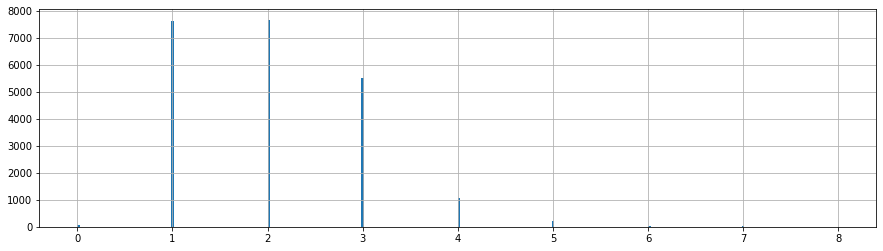

In [512]:
good_data['rooms'].hist(bins=300, figsize=(15,4));

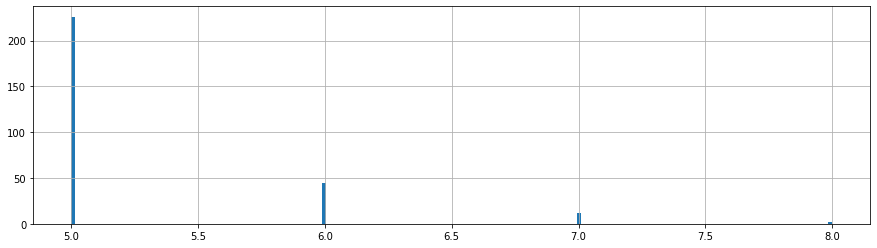

In [513]:
good_data['rooms'].hist(bins=200, range=(5, 8),figsize=(15,4));

In [514]:
# Найдем число записей с нулевым количеством комнат

good_data[good_data['rooms'] == 0]['rooms'].count()

64

In [515]:
# Проверим, возможно, это студии

good_data[(good_data['rooms'] == 0)&((good_data['studio'] ==True)|(good_data['is_apartment'] ==True))]['rooms'].count()

48

По большей части это квартиры - студии. Но их количество мало, поэтому оставим как есть, а чуть дальше, не будем эти объекты учитывать.

In [516]:
good_data['rooms'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

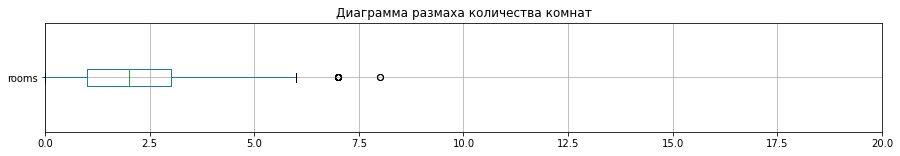

In [517]:
# Диаграмма размаха

fig, ax = plt.subplots(figsize = (15,2))
ax = good_data[['rooms']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха количества комнат')
ax.set_xlim(0, 20);

В нашей выборке уберем нулевое количество комнат и больше 12.

In [518]:
good_data = good_data.query('1 <= rooms <= 6')

In [519]:
rest_data(good_data)

93.36

##### Высота потолков

Выведем описание данных

In [520]:
good_data['ceiling_height'].describe()

count   13598
mean        3
std         1
min         1
25%         2
50%         3
75%         3
max        32
Name: ceiling_height, dtype: float64

Минимальная высота потолков 1 м и максимальная 32. 

In [521]:
good_data['ceiling_height'].isna().sum()

8528

Помним про пропуски в этой колонке

Построим гистограмму.

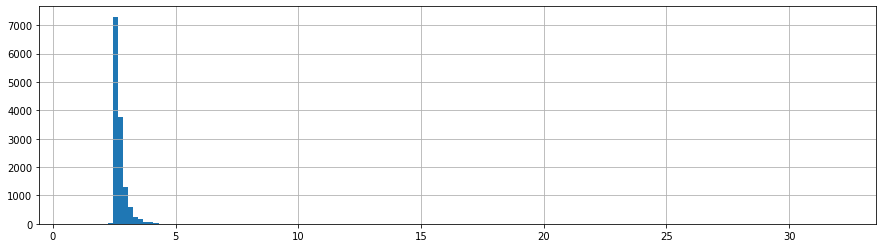

In [522]:
good_data['ceiling_height'].hist(bins=150, figsize=(15,4));

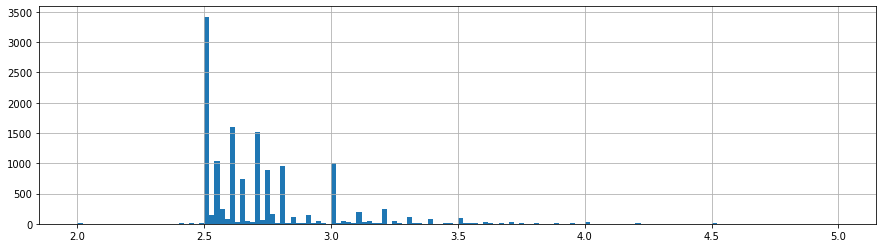

In [523]:
# поподробнее

good_data['ceiling_height'].hist(bins=150, range = (2, 5), figsize=(15,4));

Интересно, есть объекты с высотой потолков около 1 м. и более 30 м. Посмотрим, сколько их, и какие это объекты.

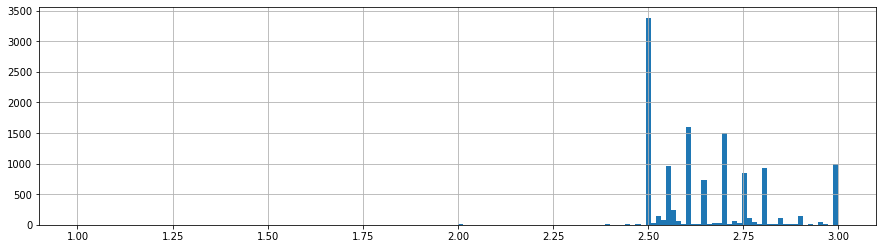

In [524]:
good_data['ceiling_height'].hist(bins=150, range=(1, 3), figsize=(15,4));

Потолки меньше 2 м явные аномалии, не будем их учитывать.

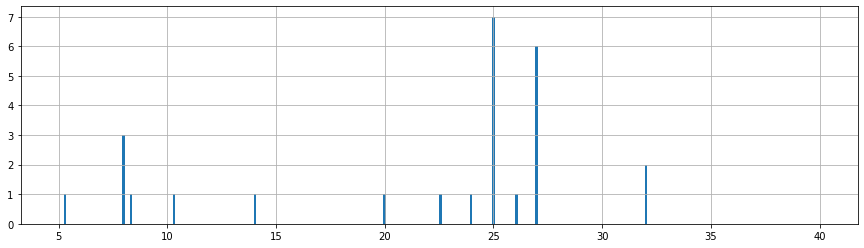

In [525]:
good_data['ceiling_height'].hist(bins=300, range=(5, 40), figsize=(15,4));

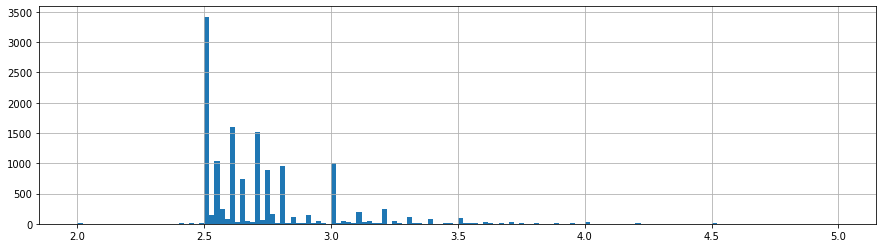

In [526]:
# Перед изменением данных, посмотрим на наиболее часто встречающиеся значения

good_data['ceiling_height'].hist(bins=150, range=(2, 5), figsize=(15,4));

Рискну предположить, что высота от 24 до 32 - это недостающая запятая. Эти значения можно исправить.

In [527]:
# Уменьшим высоту потолков

for line in good_data.query('ceiling_height >= 24')['ceiling_height'].unique():
    good_data.loc[good_data['ceiling_height'] == line, 'ceiling_height'] =\
    good_data.loc[good_data['ceiling_height'] == line, 'ceiling_height'] / 10

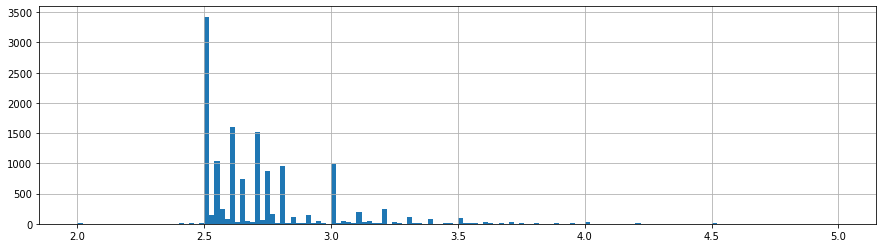

In [528]:
# Проверим, изменилась ли гистограмма

good_data['ceiling_height'].hist(bins=150, range=(2, 5), figsize=(15,4));

Попробуем заполнить высоту потолков.

In [529]:
# Создадим переменную, 
# которая рассчитает долю медианного значения высоты потолков
# с учетом группировки по 4м параметрам

rate_per_locality_ta_ccn_ft = good_data.groupby(
    ['locality_name', 'total_area', 'city_centers_nearest', 'floors_total']
)['ceiling_height'].transform(
    'median')

In [530]:
good_data['ceiling_height'] = good_data['ceiling_height'].fillna(rate_per_locality_ta_ccn_ft)

In [531]:
good_data['ceiling_height'].isna().sum()

8396

In [532]:
rate_per_locality_ta_ccn = good_data.groupby(
    ['locality_name', 'total_area', 'city_centers_nearest']
)['ceiling_height'].transform(
    'median')

In [533]:
good_data['ceiling_height'] = good_data['ceiling_height'].fillna(rate_per_locality_ta_ccn)

In [534]:
good_data['ceiling_height'].isna().sum()

8327

In [535]:
rate_per_locality_ta = good_data.groupby(
    ['locality_name', 'total_area']
)['ceiling_height'].transform(
    'median')

In [536]:
good_data['ceiling_height'] = good_data['ceiling_height'].fillna(rate_per_locality_ta)

In [537]:
good_data['ceiling_height'].isna().sum()

2447

In [538]:
rate_per_locality = good_data.groupby(
    ['locality_name']
)['ceiling_height'].transform(
    'median')

In [539]:
good_data['ceiling_height'] = good_data['ceiling_height'].fillna(rate_per_locality)

In [540]:
good_data['ceiling_height'].isna().sum()

103

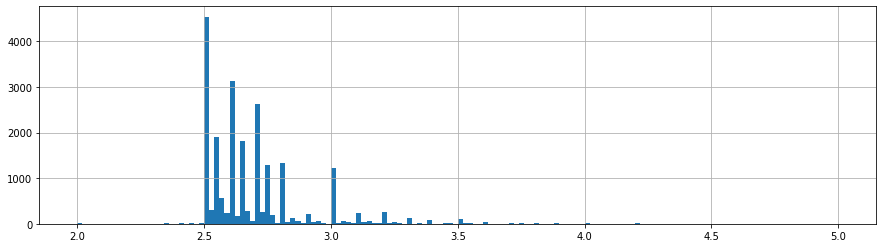

In [541]:
# Посмотрим на распределение значений после замены

good_data['ceiling_height'].hist(bins=150, range=(2,5), figsize=(15,4));

Общий характер графика не изменился. Количество, конечно, добавилось.

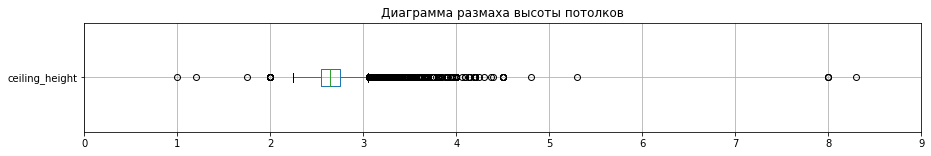

In [542]:
# Диаграмма размаха высоты потолков

fig, ax = plt.subplots(figsize = (15,2))
ax = good_data[['ceiling_height']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха высоты потолков')
ax.set_xlim(0, 9);

In [543]:
good_data[good_data['ceiling_height'] >=3.4]['ceiling_height'].count()

445

Оставим значения от 2,5 до 3,4 м

#### check CH

In [544]:
# check
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22126 entries, 0 to 22933
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 22126 non-null  int64         
 1   total_images          22126 non-null  int64         
 2   last_price            22126 non-null  float64       
 3   total_area            22126 non-null  float64       
 4   first_day_exposition  22126 non-null  datetime64[ns]
 5   rooms                 22126 non-null  int64         
 6   ceiling_height        22023 non-null  float64       
 7   floors_total          22053 non-null  float64       
 8   living_area           22126 non-null  float64       
 9   floor                 22126 non-null  int64         
 10  is_apartment          2587 non-null   object        
 11  studio                22126 non-null  bool          
 12  open_plan             22126 non-null  bool          
 13  kitchen_area    

In [545]:
good_data = good_data.query('2.5 <= ceiling_height <= 3.4')

In [546]:
# check
good_data.shape[0]

21576

In [547]:
rest_data(good_data)

91.03999999999999

In [548]:
# Проверим, что с пропусками

good_data.isna().sum()

index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               71
living_area                 0
floor                       0
is_apartment            19070
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              11
airports_nearest         4977
city_centers_nearest     4957
parks_around_3000        4956
parks_nearest           14394
ponds_around_3000        4956
ponds_nearest           13469
days_exposition          2809
price_1_sqm                 0
day_exposition_num          0
month_exposition_num        0
year_exposition_num         0
floor_category              0
city_centers_km          4957
dtype: int64

##### Тип этажа квартиры («первый», «последний», «другой»)

Описание данных

In [552]:
good_data['floor_category'].describe()

count      21576
unique         4
top       другой
freq       15954
Name: floor_category, dtype: object

In [553]:
# Какие есть значения в этой колонке

good_data['floor_category'].value_counts()

другой                   15954
последний                 2928
первый                    2623
Некорректное значение       71
Name: floor_category, dtype: int64

Построим гистограмму по данному параметру.

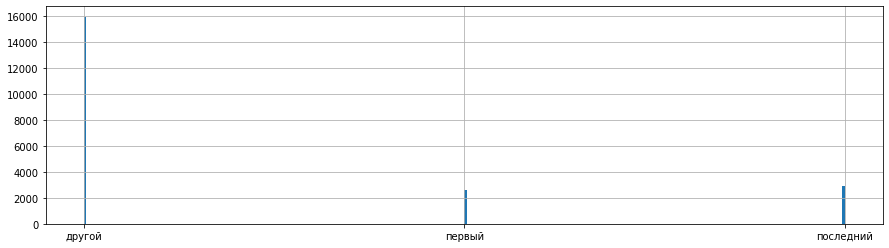

In [554]:
good_data[good_data['floor_category'] != "Некорректное значение"]['floor_category'].hist(bins=300, figsize=(15,4));

Большую часть объектов составляют квартиры не на первом или последнем этажах.

In [555]:
# Уберем некорректное значение

good_data = good_data.query('floor_category != "Некорректное значение"')

In [556]:
rest_data(good_data)

90.74

##### Общее количество этажей в доме

Описание данных

In [557]:
good_data['floors_total'].describe()

count   21505
mean       11
std         7
min         1
25%         5
50%         9
75%        16
max        60
Name: floors_total, dtype: float64

In [558]:
good_data['floors_total'].isna().sum()

0

In [559]:
good_data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 52., 60.])

Построим гистограмму по данному параметру.

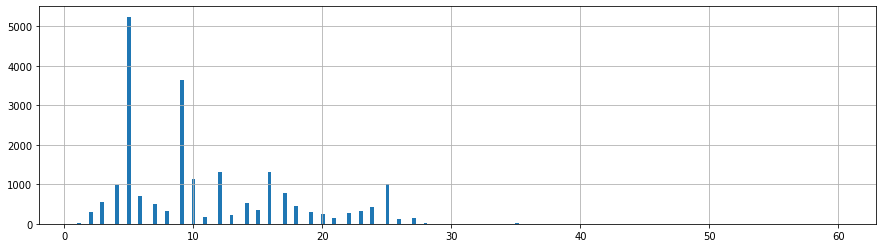

In [560]:
good_data['floors_total'].hist(bins=200, figsize=(15,4));

Хорошо видно типовые здания - 5ти, 9ти, 16ти, 25 этажей

Есть аномально высокие значения: от 30 до 60 этажей.
На рынке недвижимости СПб нет таких предложений - это явная ошибка.
Значения от 30 до 40 этажей на рынке присутсвуют, в крайне незначительном количестве.

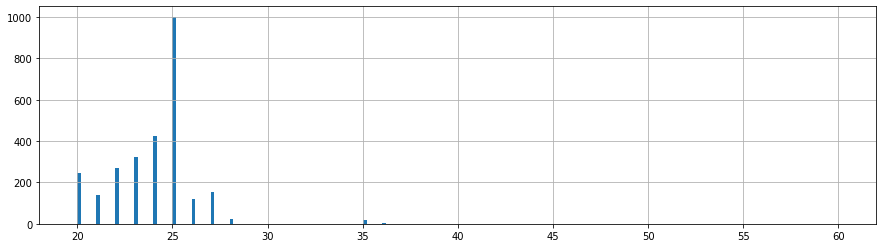

In [561]:
good_data.query('floors_total >= 20')['floors_total'].hist(bins=200, figsize=(15,4));

Так и есть, больше 35 этажей - выброс

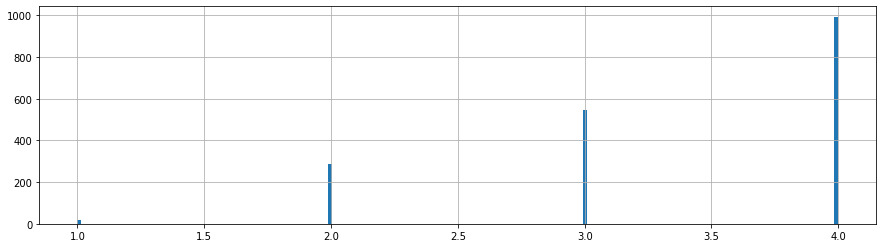

In [562]:
# Одно и двух-этажные здания

good_data.query('floors_total <= 4')['floors_total'].hist(bins=200, figsize=(15,4));

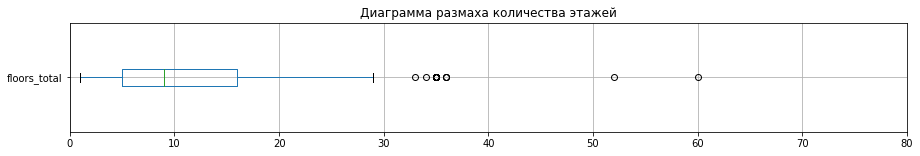

In [563]:
# Диаграмма размаха по этажности

fig, ax = plt.subplots(figsize = (15,2))
ax = good_data[['floors_total']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха количества этажей')
ax.set_xlim(0, 80);

Скорректируем нашу выборку по количеству этажей

In [564]:
good_data = good_data.query('1 <= floors_total <=30')

In [565]:
rest_data(good_data)

90.63

##### Расстояние до центра города в метрах

Выведем описание данных по данному параметру.

In [566]:
good_data['city_centers_nearest'].describe()

count   16526
mean    14594
std      8504
min       287
25%     10018
50%     13307
75%     16454
max     65968
Name: city_centers_nearest, dtype: float64

Построим гистограмму по данному параметру.

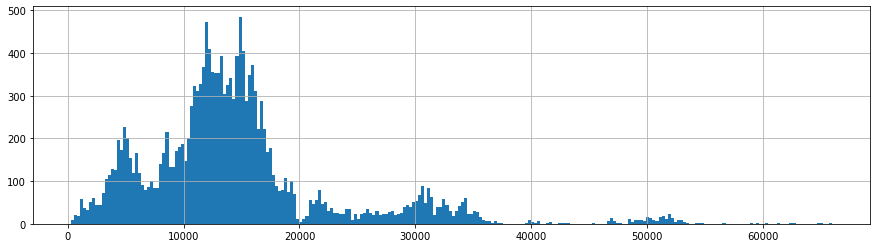

In [567]:
good_data['city_centers_nearest'].hist(bins=250, figsize=(15,4));

Пик объектов - на расстоянии 12 км. и 17 км. от центра, затем чуть меньше объектов - на расстоянии 5 км. от центра. Далее  всплеск - 21 -26 км, потом 31-33-35 км. от центра 2 -3 км и 50-51-52 км, и 40 км. последнее значимое увеличение числа объектов. Наоборот провалы на расстоянии 20 км, 7 км, 15 км, и далее 32, 33, 35 км.

Если посмотреть по карте, то получим, что пики это:
* 900 м - Московский вокзал ?
* 1-2 - Лахта-Центр ?
* **4-5 км - здесь много объектов невысокой этажности**
* 8 км - ?
* **11-12 км - полагаю, районы с новостройками, может спальные**
* **15 км - (аналогично предыдущему пункту)**
* 21 км - ?
* **30 км - Кронштадт**
* 33 км - Павловск
* 35 км - Дудергофские высоты
* 40 км - Петергоф
* **47 км - Гатчина**
* **50 км - Шлиссельбург**
* **53 км - Зеленогорск, Коккорево**

Провалы:
* 3 км - Возможно меньше жилой недвижимости по историческим причинам
* **6-7 км - аналогично предыдущему пункту** 
* **13-14 км - ? **
* 16 км - аэропорт Ржевка
* 17 км - 19 км - Западный скоростной диаметр
* **20 км - аэропорт Пулково**

Поскольку мы видим интересные данные на всем протяжении данного показателя, рассмотрим более детально минимальные и максимальные границы. Сам город здесь не будем затрагивать, тк у нас есть целый отдельный пункт для Санкт-Петербурга.

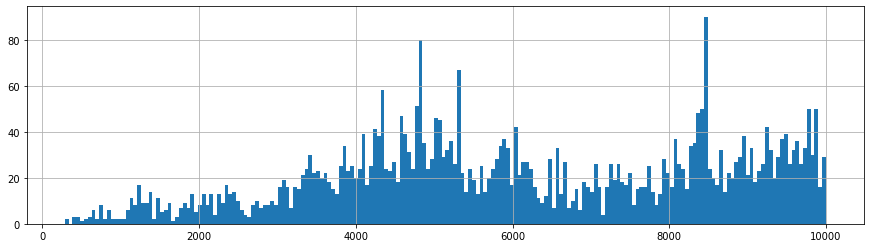

In [568]:
# До 10 км.
 
good_data.query('city_centers_nearest <= 10000')['city_centers_nearest'].hist(bins=200, figsize=(15,4));

Самые первые объекты расположены пимерно в 100 м от центра.
Группы объектов в пределах 1,15 - 1,25км., 1,4-1,5км и 2,3 - 2,5км.

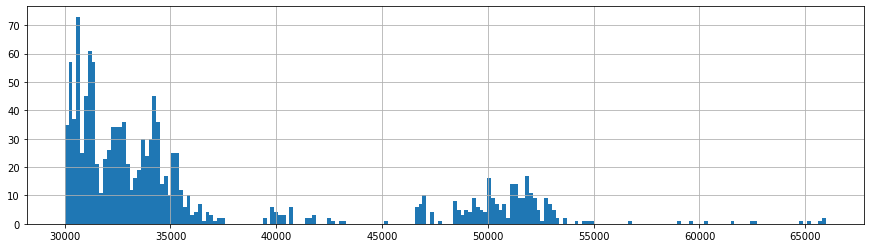

In [569]:
# От 30 км
 
good_data.query('city_centers_nearest >= 30000')['city_centers_nearest'].hist(bins=200, figsize=(15,4));

Тут хорошо выделяются пики, перечисленные выше - Кронштадт, Петергоф, Гатчина, Шлиссельбург.

In [570]:
# Мы помним, что в рассматриваемом параметре были пропущенные значения
# Посмотрим, сколько их

good_data['city_centers_nearest'].isna().sum()

4952

In [571]:
# Попробуем заменить пропуски на среднее значение по локации
for name in good_data['locality_name'].unique():
    good_data.loc[(good_data['city_centers_nearest'].isna())&(good_data['locality_name'] == name), 'city_centers_nearest'] =\
    good_data.loc[(good_data['locality_name'] == name) , 'city_centers_nearest'].mean()

In [572]:
# Посмотрим, сколько осталось пропусков

good_data['city_centers_nearest'].isna().sum()

4895

In [573]:
# В основном данные не заполнены по локациям в Ленинградской области

good_data[good_data['city_centers_nearest'].isna()]['locality_name'].value_counts().head(25)

пгт Мурино                 518
деревня Кудрово            416
Всеволожск                 372
Гатчина                    294
Выборг                     210
деревня Новое Девяткино    137
Сертолово                  137
Кириши                     119
поселок Бугры              104
Тосно                      100
Сланцы                      94
Кингисепп                   94
Волхов                      89
Коммунар                    82
Сосновый Бор                82
Кировск                     79
Отрадное                    78
Никольское                  77
пгт Янино-1                 65
Приозерск                   64
деревня Старая              63
Шлиссельбург                56
Тихвин                      48
поселок Тельмана            41
пгт Рощино                  36
Name: locality_name, dtype: int64

Можно, конечно, заполнить пропуски данными из Википедии, но поскольку это не ключевой параметр, не будем тратить время.

Построим диаграмму размаха.

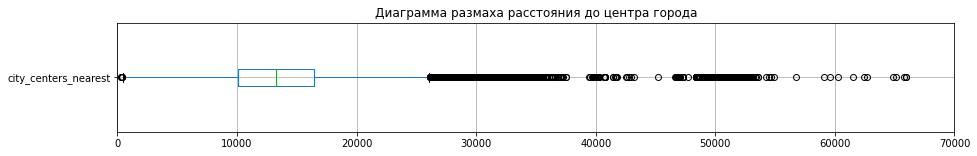

In [574]:
fig, ax = plt.subplots(figsize = (15,2))
ax = good_data[['city_centers_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха расстояния до центра города')
ax.set_xlim(0, 70000);

Что ж, тут нам все объекты пригодятся. Переходим к следущему пункту.

##### Расстояние до ближайшего парка

Выведем описание колонки.

In [575]:
good_data['parks_nearest'].describe()

count   7148
mean     497
std      346
min        1
25%      292
50%      456
75%      616
max     3190
Name: parks_nearest, dtype: float64

Построим гистограмму по данному показателю.

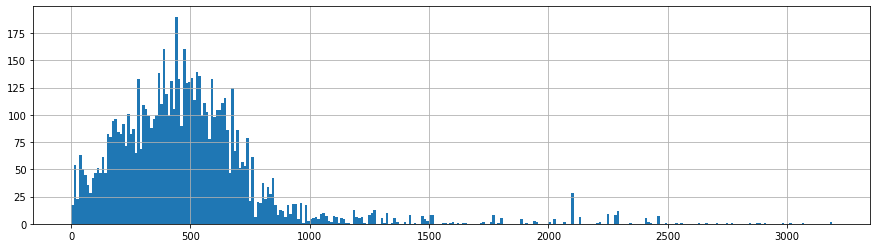

In [576]:
good_data['parks_nearest'].hist(bins=300, figsize=(15,4));

In [577]:
# И сразу посмотрим на количество пропусков

good_data['parks_nearest'].isna().sum()

14330

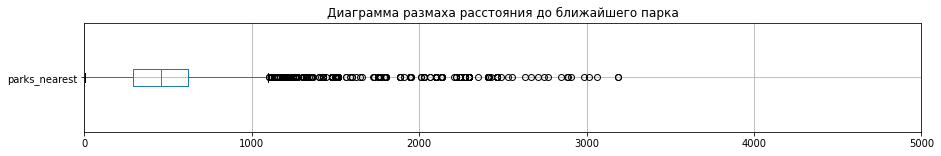

In [578]:
# Построим диаграмму размаха

fig, ax = plt.subplots(figsize = (15,2))
ax = good_data[['parks_nearest']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха расстояния до ближайшего парка')
ax.set_xlim(0, 5000);

Пожалуй, в данном случае, можно оставить пропуски, тк их число довольно велико, а параметр не ключевой.

In [579]:
# Проверим объем данных

rest_data(good_data)

90.63

In [580]:
# В конце данного большого блока преобразований выведем информацию о нашей очищенной от аномалий выборке

good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21478 entries, 0 to 22933
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 21478 non-null  int64         
 1   total_images          21478 non-null  int64         
 2   last_price            21478 non-null  float64       
 3   total_area            21478 non-null  float64       
 4   first_day_exposition  21478 non-null  datetime64[ns]
 5   rooms                 21478 non-null  int64         
 6   ceiling_height        21478 non-null  float64       
 7   floors_total          21478 non-null  float64       
 8   living_area           21478 non-null  float64       
 9   floor                 21478 non-null  int64         
 10  is_apartment          2503 non-null   object        
 11  studio                21478 non-null  bool          
 12  open_plan             21478 non-null  bool          
 13  kitchen_area    

In [581]:
good_data.isna().sum()

index                       0
total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            18975
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              11
airports_nearest         4972
city_centers_nearest     4895
parks_around_3000        4951
parks_nearest           14330
ponds_around_3000        4951
ponds_nearest           13439
days_exposition          2794
price_1_sqm                 0
day_exposition_num          0
month_exposition_num        0
year_exposition_num         0
floor_category              0
city_centers_km          4952
dtype: int64

Сравним пропуски в начале работы с файлом и после преобразований.

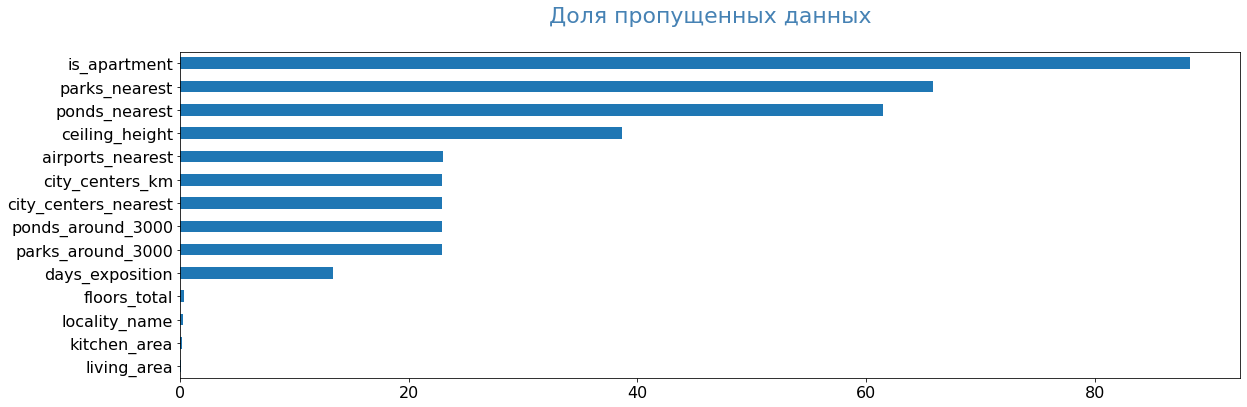

In [582]:
pass_value_barh(data)

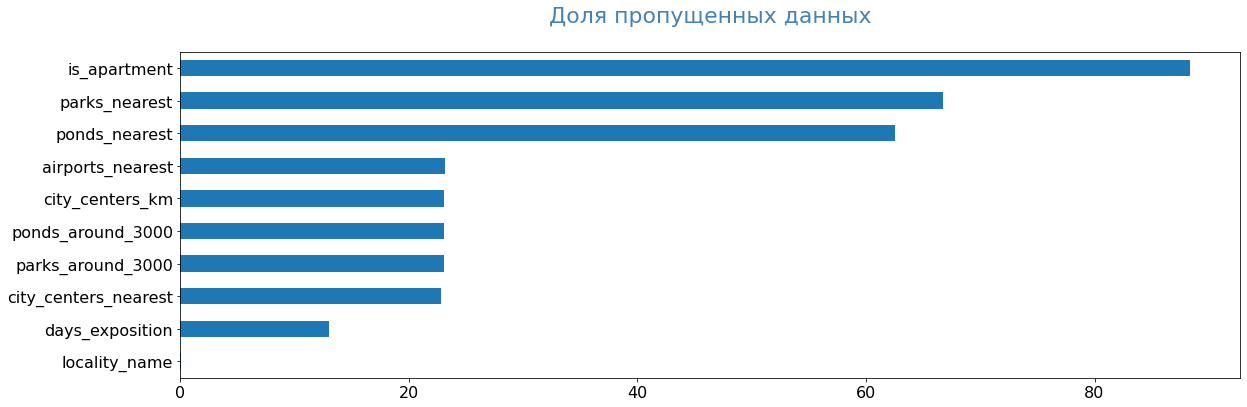

In [583]:
pass_value_barh(good_data)

Проверим аномалии

In [584]:
(
    good_data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

Количество дней экспозиции рассмотрим в следующем шаге.

**Вывод:**

Мы рассмотрели основные показатели недвижимости, представленные в таблице. По показателям площади, стоимости, этажу и этажности выявили и удалили аномально высокие и аномально низкие значения. 

По показателям Расстояние до центра и до ближайшего парка - оставили представленные данные, тк это не ключевые показатели.

Рассчитали границы нормального распределения, построили гистораммы и посмотрели Диаграммы размаха. 

Поменяем тип данных в колонке floors_total на целочисленный.

#### Скорость продажи квартир

Начнем с расссмотрения данных по столбцу days_exposition с общей информации.

In [596]:
good_data['days_exposition'].describe()

count   18684
mean      179
std       217
min         1
25%        45
50%        95
75%       229
max      1580
Name: days_exposition, dtype: float64

Минимальное число дней до продажи квартиры в нашей таблице = 1 день, максимальное 1580 дней. Медиана = 95, а средний срок продажи квартир составляет 179. При этом четверть квартир продается в течение 45 дней, и 75% - в течение 229 дней.

In [597]:
# Проверим число пропусков

good_data['days_exposition'].isna().sum()

2794

In [598]:
# Выведем записи, с days_exposition = 0 (проверим есть ли такие)

good_data.query('days_exposition == 0')

Empty DataFrame
Columns: [index, total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition, price_1_sqm, day_exposition_num, month_exposition_num, year_exposition_num, floor_category, city_centers_km]
Index: []

In [599]:
#  Поскольку сейчас нулей в этой колонке нет, но есть пропуски
# Заменим пропуски в колонке days_exposition на нули

good_data['days_exposition'] = good_data['days_exposition'].fillna(0)

In [600]:
# Применим целочисленный тип к этой колонке

good_data['days_exposition'] = good_data['days_exposition'].astype(int, errors='ignore')

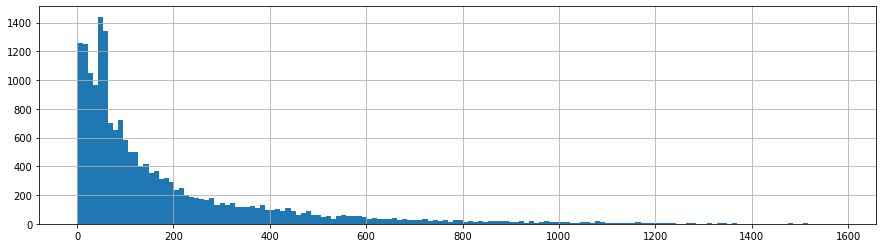

In [601]:
# Построим гистограмму без учета нулей

good_data.query('days_exposition != 0')['days_exposition'].hist(bins=150, figsize = (15,4));


Есть очень большие сроки продажи квартир - до 1600 дней или больше 4х лет. Число таких объектов крайне мало. 
А вот объекты со сроком экспозиции, близким к нулю, занимают очень большую долю.

Посмотрим, сколько значений больше 900 дней

In [602]:
good_data.query('days_exposition >=900')['days_exposition'].count()

363

In [603]:
# Найдем среднее время продажи квартир по локациям и годам

good_data.query(
    'days_exposition >=900'
).pivot_table(
    index=['locality_name', 'year_exposition_num'], values='days_exposition', aggfunc=('count', 'mean')
).sort_values(by='year_exposition_num', ascending=True)

count  mean
locality_name    year_exposition_num             
Сестрорецк       2014                     1  1489
Пушкин           2014                     2  1354
Петергоф         2014                     1  1133
Шлиссельбург     2014                     1  1314
деревня Калитино 2014                     1  1105
...                                     ...   ...
Сланцы           2016                     1   924
Сестрорецк       2016                     1   947
Пушкин           2016                     2   976
Коммунар         2016                     1   984
поселок Шушары   2016                     2  1098

[68 rows x 2 columns]

Есть населенные пункты, в которых за весь период данных продан только 1 - 2 объекта.

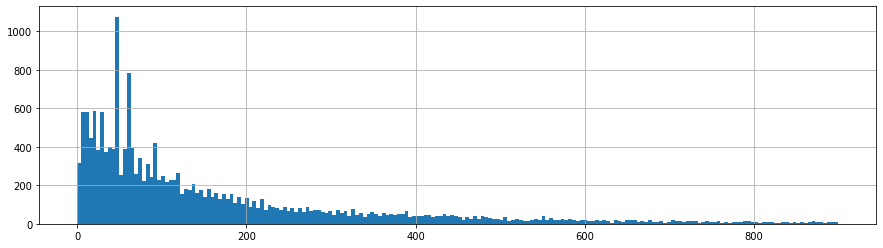

In [604]:
# Ограничим максимальное число дней

good_data.query('days_exposition != 0')['days_exposition'].hist(bins=200, range=(0, 900), figsize = (15,4));

И у нас есть подозрительно-аномальные значения до 100 дней. Рассмотрим поближе, где именно они возникают.

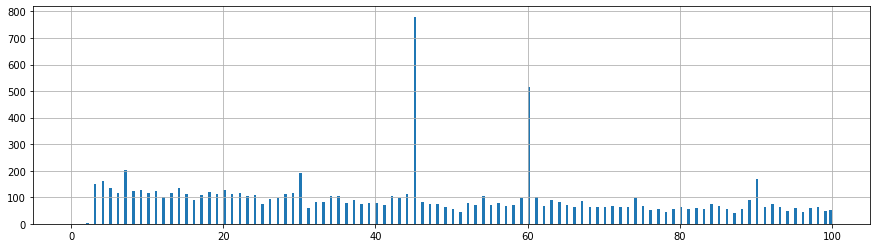

In [605]:
good_data.query('days_exposition !=0')['days_exposition'].hist(bins=300, range=(0,100), figsize = (15,4));

Аномалии на 7й, 30й, 45й , 60й и 90й день. Особенно выдающиеся 45й и 60й дни. Это сроки закрытия объявления на объект стоимостью до 4,5 млн и от 4,5 до 10 млн соответственно. На 90й день закрываются объявления стоимостью от 10 млн.
Наибольший объем составляют квартиры до 4,5 млн и затем от 4,5 до 10 млн. 
На 31й день продлеваются платные объявления, возможно, с этим связан пик закрытий на 30й день. (плюс все кратные 30).
А с 7м днем не очень понятно пока. 
Отделить автоматические закрытия от действительной продажи мы не можем. 
Пожалуй, пики на 45 и 60 день стоит удалить, как аномалии.

In [606]:
# Посмотрим для начала, сколько таких значений

good_data.query(
    'days_exposition == 45 or days_exposition == 60'
)['days_exposition'].count()

1296

Их довольно много, но это явно портит все данные.

In [607]:
# Удалим 45 и 60 дни

good_data = good_data.query(
    'days_exposition != 45 and days_exposition != 60'
)

In [608]:
# Проверим их количество

good_data.query(
    'days_exposition == 45 or days_exposition == 60'
)['days_exposition'].count()

0

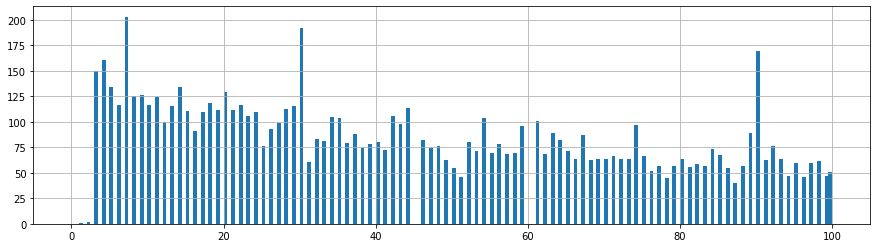

In [609]:
# Посмотрим, как наше распределение сейчас выглядит

good_data.query('days_exposition != 0')['days_exposition'].hist(bins=200, range=(0,100), figsize = (15,4));

In [610]:
# Думаю 7й, 30й и 90й день тоже можно удалить - сейчас они сильно выбиваются из общего объема данных.

good_data = good_data.query(
    'days_exposition != 7 and days_exposition != 30 and days_exposition != 90'
)

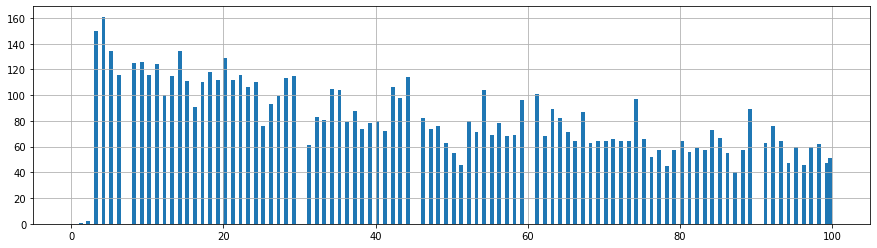

In [611]:
# Проверим распределение

good_data.query('days_exposition != 0')['days_exposition'].hist(bins=200, range=(0,100), figsize = (15,4));

На этих днях, конечно, появились пустоты, но остальные данные показаны равномерно.

In [612]:
good_data.query(
    'days_exposition == 7'
)['days_exposition'].count()

0

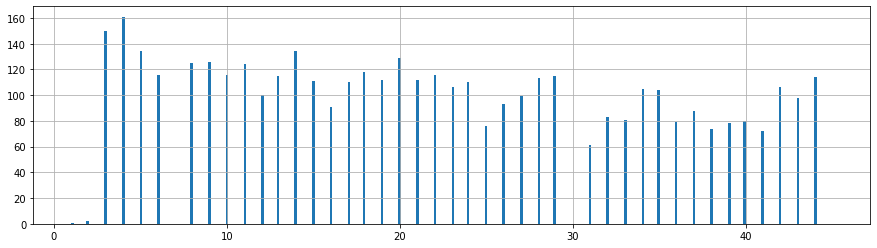

In [613]:
# Рассмотрим малые сроки продаж
# 0 не включаем, чтобы не создавать аномалии на графике

good_data['days_exposition'].hist(bins=300, range=(1,45), figsize = (15,4));

Продажи за 1 и 2 дня, думаю, можно исключить из рассмотрения, их буквально единицы. Довольно много продаж , начиная с 3го дня.

In [614]:
good_data.query(
    '1 <= days_exposition <= 2'
)['days_exposition'].count()

3

Посмотрим, есть ли связь между временем размещения объявления и количеством дней экспозиции.

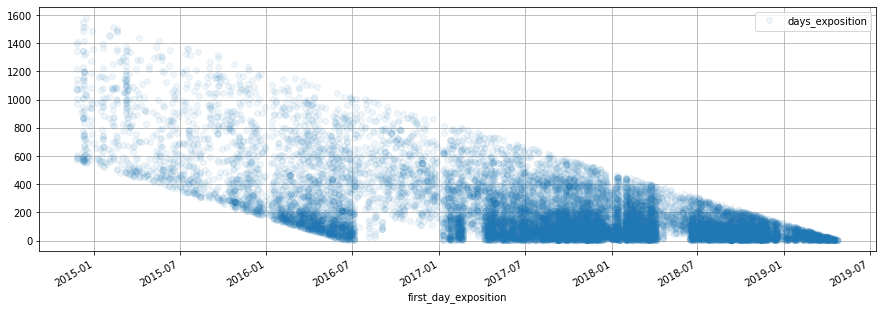

In [615]:
good_data.query('days_exposition > 2 ').plot(
    x='first_day_exposition', 
    y='days_exposition', 
    style='o',
    alpha=0.07,
    grid=True,
    figsize=(15,5)
);

# first_day_exposition days_exposition  ylim=(0,2000),

Основная часть квартир продается в срок до 250 дней. 

Но есть некоторые странности на графике: отсутствуют продажи с обычным сроком размещения до 2й половины 2016, провалы в данных с июля 2016 по январь 2017, примерно в марте 2017 и  май-июнь 2018.

Как будто данные 2015 года так и не закрыты до 2019 (как раз примерно 4 года получается эти 1600 дней. Может тогда не было автоматического закрытия объявлений? И , видимо , какое-то обновление сервиса в 2016г.

На всякий случай, посмотрим, не повлияло ли наше удаление 45, 60 и проч.дня - построим такой же график на исходных данных.

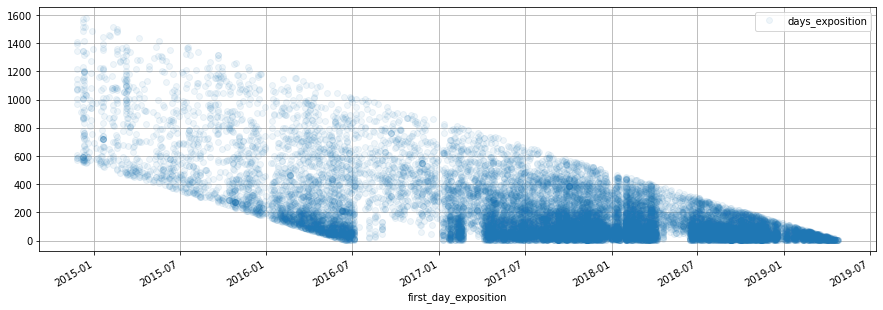

In [616]:
data.query('days_exposition > 2 ').plot(
    x='first_day_exposition', 
    y='days_exposition', 
    style='o',
    alpha=0.07,
    grid=True,
    figsize=(15,5)
);

Может, это связано с развитием самого сервиса Яндекс.Недвижимость. в Декабре 2014 года пользователи начали самостоятельно публиковать объявления, сентябрь 2015 года - выход мобильного приложения и акцент на агентствах недвижимости, июль 2016 - совместная работа с РБК-Недвижимость.

В целом получается, чем раньше опубликовано объявление, тем дольше оно висит в размещенных объявлениях и увеличивает скорость продажи. А данные за 2019 год пока не полные, и поэтому скорость продажи выше, потому что объекты сболее длительными сроками еще не проданы. 

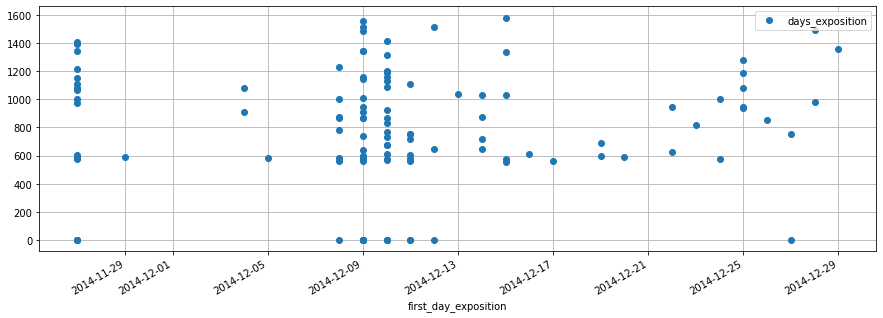

In [617]:
# Посмотрим на период 2014 года - там совсем небольшой кусочек получается

good_data.query('first_day_exposition < "2015-01-01"').plot(
    x='first_day_exposition', 
    y='days_exposition', 
    style='o',
#    alpha=0.1,
    grid=True,
    figsize=(15,5)
);


In [618]:
good_data.query('first_day_exposition < "2015-01-01"')['days_exposition'].count()

122

Какие-то не понятные значения, тут и нули и сроки продаж до 1600 дней. И число их всего 122 объекта. Если это действительно не закрытые объявления, то они не релевантны и будут портить общие данные по скорости продаж. Не будем их учитывать в данном пункте.

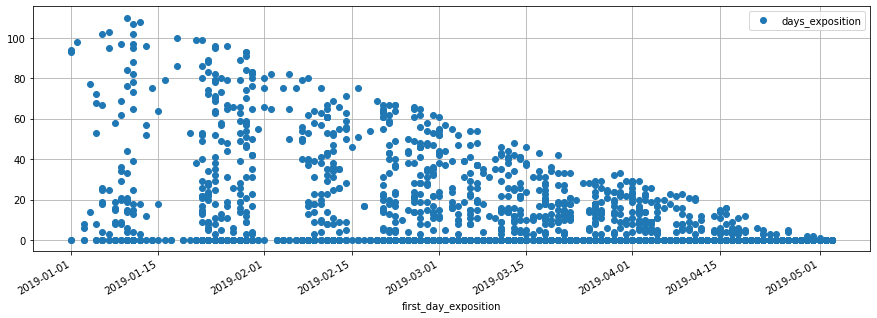

In [619]:
# Посмотрим на период 2019 года

good_data.query('first_day_exposition >= "2019-01-01"').plot(
    x='first_day_exposition', 
    y='days_exposition', 
    style='o',
#    alpha=0.1,
    grid=True,
    figsize=(15,5)
);


In [620]:
good_data.query('first_day_exposition >= "2019-05-01"')['days_exposition'].count()

54

В 2019 тоже получается данные более менее релевантные только до февраля, потому что по остальным (до мая) квартиры еще не успели продаться в рамках среднего срока (3 мес.) только быстрые продажи.

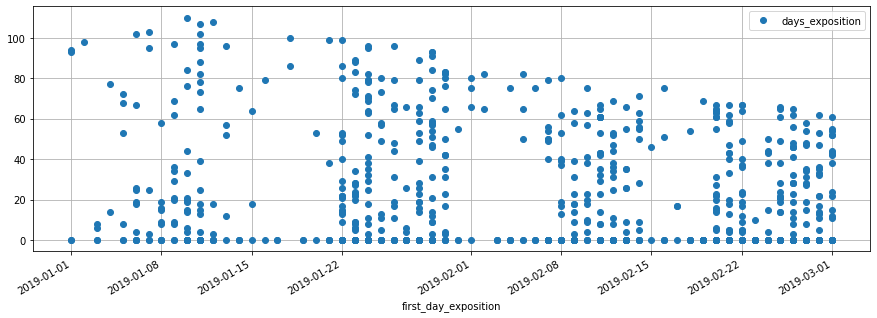

In [621]:
# Посмотрим на всплески активности в январе-марте 2019 (просто интересно ))

good_data.query(' "2019-01-01"<= first_day_exposition <= "2019-03-01"').plot(
    x='first_day_exposition', 
    y='days_exposition', 
    style='o',
#    alpha=0.1,
    grid=True,
    figsize=(15,5)
);


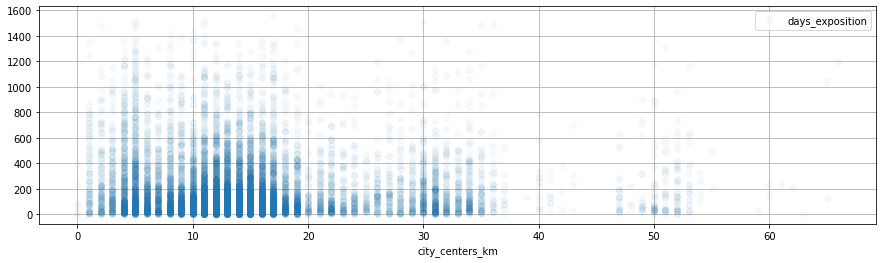

In [622]:
# Как выглядит количество дней размещения объявления в связке с удаленностью от центра города.

good_data.query('days_exposition > 2 ').plot(
    x='city_centers_km', 
    y='days_exposition', 
    style='o',
    alpha=0.03,
    grid=True,
    figsize=(15,4)
);

Срок продажи более длительный для объектов в пределах 4-5 км от центра, примерно 11-17 км  и затем 30-31км.

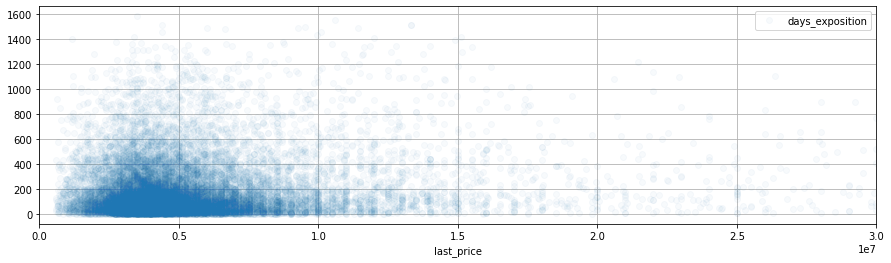

In [623]:
# Как связаны время продажи цены

good_data.query('days_exposition > 2').plot(
    x='last_price', 
    y='days_exposition',
    xlim=(0,30000000),
    style='o',
    alpha=0.03,
    grid=True,
    figsize=(15,4)
);

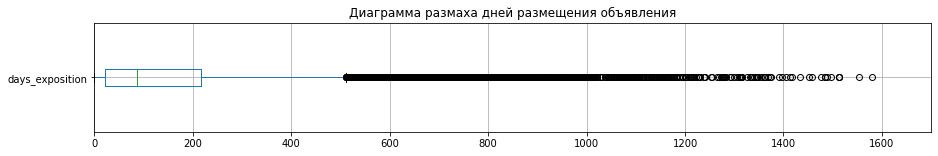

In [624]:
# Построим диаграмму размаха

fig, ax = plt.subplots(figsize = (15,2))
ax = good_data[['days_exposition']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха дней размещения объявления')
ax.set_xlim(0, 1700);

Есть населенные пункты с единичными продажами за все время наблюдений в нашей выборке (с конца 2014 по 2019 годы). Здесь же, кстати и самые долгие сроки продаж, и скорее всего не закрыли объявление. 

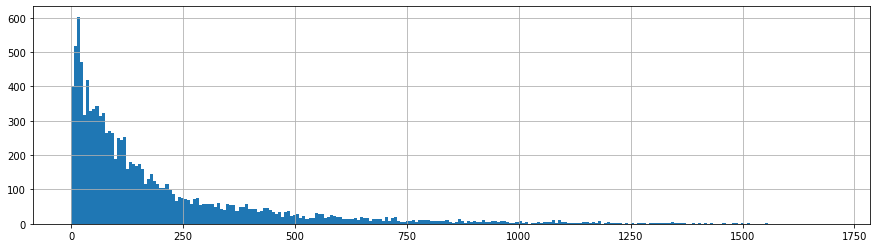

In [625]:
# Рассмотрим гисторгамму по Санкт-Петербургу

good_data.query(
    'locality_name == "Санкт-Петербург" and days_exposition !=0'
)['days_exposition'].hist(bins=250, range=(0,1700), figsize = (15,4));

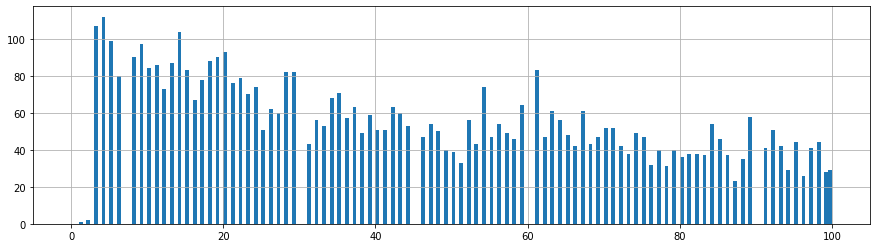

In [626]:
# До 100 дней

good_data.query(
    'locality_name == "Санкт-Петербург" and days_exposition !=0'
)['days_exposition'].hist(bins=200, range=(0,100), figsize = (15,4));

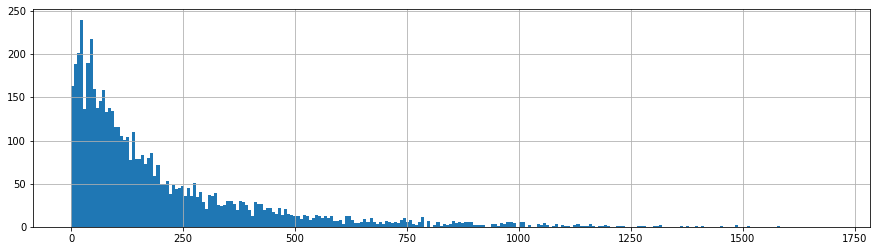

In [627]:
# Рассмотрим гисторгамму по Объектам Лен. области

good_data.query(
    'locality_name != "Санкт-Петербург" and days_exposition !=0'
)['days_exposition'].hist(bins=250, range=(0,1700), figsize = (15,4));

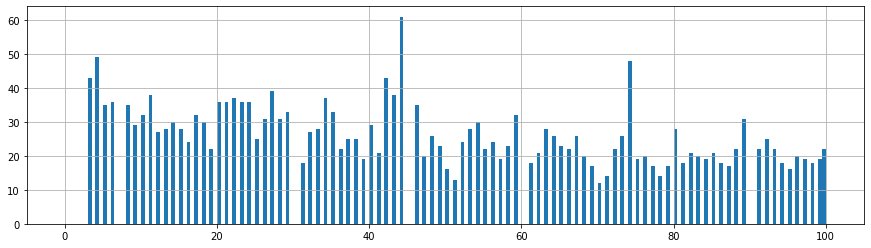

In [628]:
# До 100 дней

good_data.query(
    'locality_name != "Санкт-Петербург" and days_exposition !=0'
)['days_exposition'].hist(bins=200, range=(0,100), figsize = (15,4));

В гистограмме по области выдаются 44й и 74й день

Быстрые и долгие продажи есть в обеих группах. Распределение выглядит схоже.

In [629]:
# Избавимся от слишком выдающихся значений в нашей выборке
good_data = good_data.query('days_exposition !=1 and days_exposition !=2 and days_exposition <= 900')

In [630]:
rest_data(good_data)

81.26

Для дальнейших расчетов нам нужно будет выбрать адекватную по срокм продажи группу объектов. Для этого отделим Экстремально быстрые и экстремально долгие продажи , а также населенные пункты, где доля таких продаж составляет более 50 %. Затем рассчитаем медиану дней размещения по отобранным населенным пунктам. И потом сможем посмотреть общие данные о продажах в целом.

In [631]:
# check
good_data.shape[0]

19258

Экстремально быстрыми продажами я бы назвала продажи со сроком менее 5 дней (исходя из процедуры купли-продажи), а экстремально долгими - со сроком более 550 дней (основная масса квартир продается до 1,5 лет).

In [632]:
# Добавим в таблицу метки для слишком долгих и слишком быстрых продаж

good_data['too_fast'] = good_data['days_exposition'] < 5
good_data['too_slow'] = good_data['days_exposition'] > 550

In [633]:
# Отберем объекты со слишком быстрыми и слишком медленными продажами

too_fast = good_data.pivot_table(index='locality_name', values='too_fast')
too_slow = good_data.pivot_table(index='locality_name', values='too_slow')

In [634]:
# Узнаем населенные пункты, где доля слишком быстрых и слишком долгих продаж составляет меньше 50%

good_data_id_fast = too_fast['too_fast'] < 0.5
good_data_id_slow = too_slow['too_slow'] < 0.5

In [635]:
# Выберем из наших очищенных данных эти населенные пункты, 
# с учетом нормального времени продаж (не сверх-быстрые и не сверх-медленные)

good_data_g_days = good_data.query('locality_name in @good_data_id_fast.index and locality_name in @good_data_id_slow.index and 5 <= days_exposition <= 550')

In [636]:
# По релевантным данным посчитаем медианное время продажи по каждому населенному пункту

med_days_per_locality = good_data_g_days.pivot_table(index='locality_name', values='days_exposition', aggfunc='median')

In [637]:
# И теперь узнаем показатели времени продаж в целом по выборке, с учетом проделанного отбора данных

med_days_exposition = med_days_per_locality['days_exposition'].describe()

In [638]:
med_days_exposition

count   215
mean    160
std      97
min       5
25%      96
50%     138
75%     196
max     540
Name: days_exposition, dtype: float64

In [639]:
rest_data(good_data_g_days)

64.09

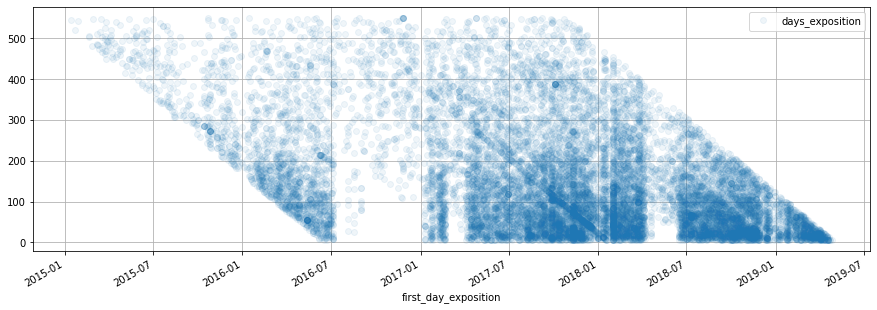

In [640]:
# Посмотрим, что с продажами по годам

good_data_g_days.plot(
    x='first_day_exposition', 
    y='days_exposition', 
    style='o',
    alpha=0.07,
    grid=True,
    figsize=(15,5)
);


...Так-то , по-хорошему, тут только 2017 год более менее целиком представлен.

И вот, погуглив про 2016 год - это был кризис на рынке недвижимости и в экономике в целом. Видимо, поэтому квартир продавалось мало и очень медленно. Но и изменения в сервисе Яндекса, думаю, также влияют.

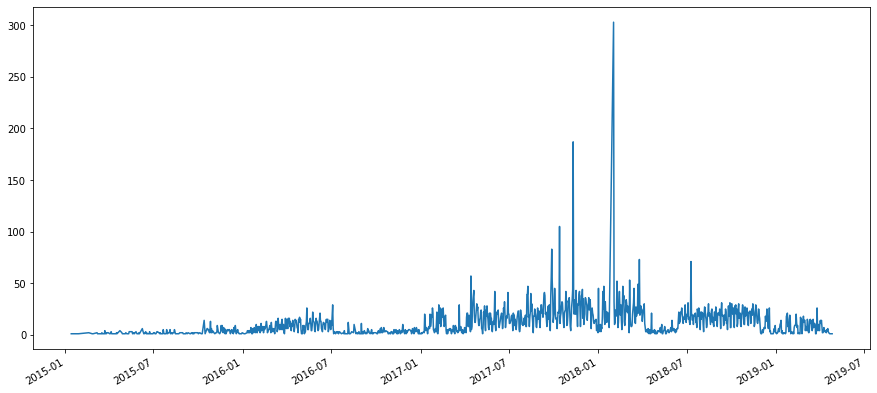

In [641]:
# Посмотрим на количество объявлений

good_data_g_days['first_day_exposition'].value_counts().plot(figsize=(15,7));

Так и есть, в местах провалов объявлений очень мало. Интересные какие-то всплески ближе к 2018.

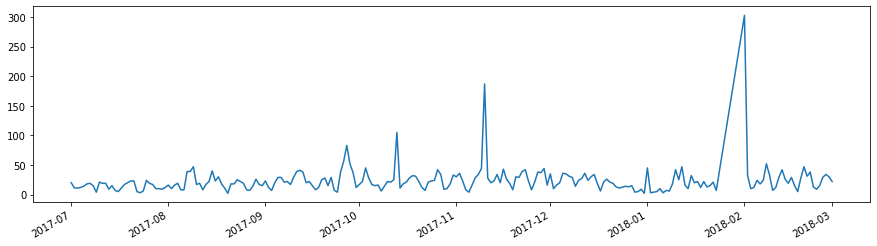

In [642]:
good_data_g_days.query('"2017-07-01" <= first_day_exposition <= "2018-03-01"')['first_day_exposition'].value_counts().plot(figsize=(15,4));

До марта 2018г много людей решило продать квартиры. Пожалуй, не будем углублятся в факторы, лежащие за пределами рынка недвижимости Санкт-Петербурга в 2015 - 2019 гг.

In [643]:
# Проверим аномалии  в общей выборке
(
    good_data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height',    
          'floor', 'floors_total', 'days_exposition']]
    .apply (['count','min', 'median', 'max'])   
    .style.format("{:,.2f}")
)

In [644]:
# Проверим аномалии в выборке по дням
(
    good_data_g_days[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height',    
          'floor', 'floors_total', 'days_exposition']]
    .apply (['count','min', 'median', 'max'])   
    .style.format("{:,.2f}")
)

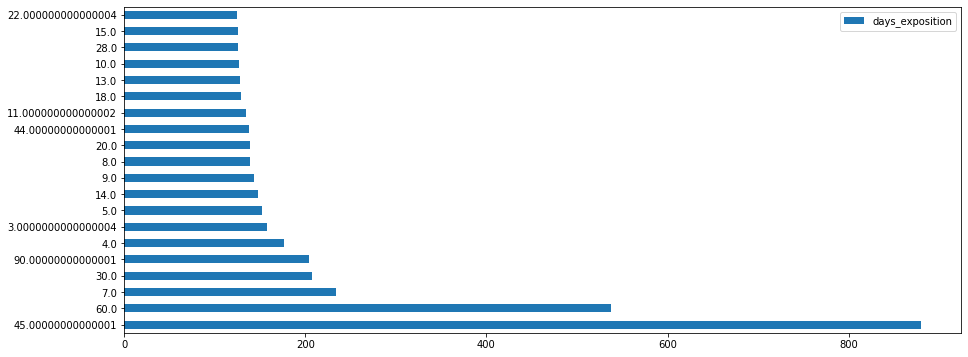

In [645]:
# check
# Моды на реальных данных

try:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t') 
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

**Вывод:**
С учетом исключения всех незаполненных данны, крайних значений, и локаций с аномальными продажами, минимальное время продажи составляет 18 дней, максимальное 541 дней. В среднем срок продажи составляет 168 дней, при медианном значении 145.

К быстрым продажам можно отнести сроки до 103 дней (примерно 3 месяца), а к длительным - больше 200 дней (чуть болше полугода).

#### Факторы, влияющие на Стоимость объекта недвижимости

Изучим, зависит ли стоимость от:
* расстояния до центра города
* общей площади
* жилой площади
* площади кухни
* количества комнат
* этажа, на котором расположена квартира (первый, последний, другой)
* даты размещения (день недели, месяц, год).

Рассмотрим последовательно эти зависимости.

##### Стоимость - Расстояние до центра города

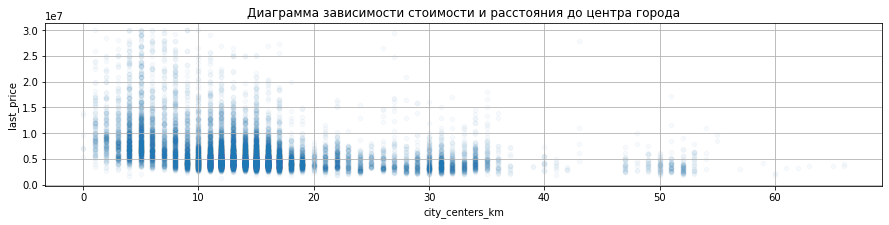

In [646]:
# Посмотрим на диаграмме рассеяния зависимость стоимости и удаленности от центра города

good_data.plot.scatter(
    title='Диаграмма зависимости стоимости и расстояния до центра города',
    x='city_centers_km',
    y='last_price',
    alpha=0.03,
    grid=True,
    figsize=(15,3)
);

Н адиаграмме рассеяния видно и общую тенденцию изменения стоимости (выше в центре, средние показатели от 9 до 18 км, примерно на тоже уровне в пределах 30-32 км, и еще одна область окол 50го км.), так и количество объектов - максимальное в пределах 10-18 км.

Рассмотрим еще зависимость стоимости объекта и расстояния до центра города.
Здесь лучше взять медианное значение, чтобы исключить влияние единичных объектов по минимальной или максимальной стоимости.

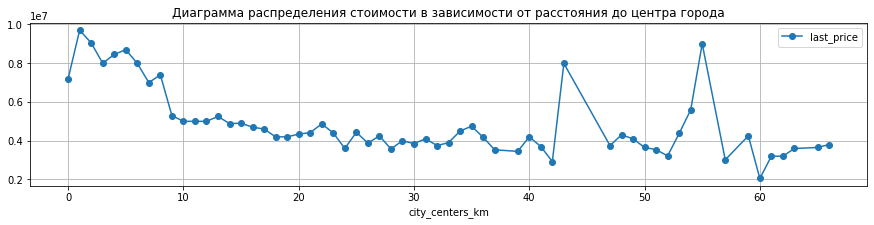

In [647]:
# График зависимости Стоимости от расстояния до центра города
# Медианные значения цены

good_data.pivot_table(
    index='city_centers_km',
    values='last_price',
    aggfunc=('median')
).reset_index(
).plot(
    title='Диаграмма распределения стоимости в зависимости от расстояния до центра города',
    x='city_centers_km',
    y='last_price',
    style="o-",
    grid=True,
    figsize=(15,3),
#    c='cyan'
);

Тут ожидаемо максимальная стоимость в самом центре, снижается в пределах 10 км. затем стабилизируется. И следующие пики на 43м и 55м км от центра. На 60м км стоимость минимальна (но там и число объектов мало и они по низкой стоимости).

##### Стоимость - Общая площадь.

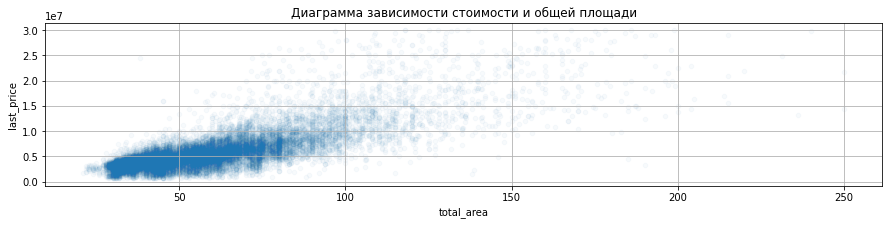

In [648]:
# Посмотрим на диаграмме рассеяния зависимость стоимости и общей площади

good_data.plot.scatter(
    title='Диаграмма зависимости стоимости и общей площади',
    x='total_area',
    y='last_price',
    alpha=0.03,
    grid=True,
    figsize=(15,3)
);

In [649]:
# Коэффициент коррекляции

good_data['total_area'].corr(good_data['last_price'])

0.782571328276531

Стоимость довольно сильно зависит от общей площади. Это важный количетсвенный, но далеко не единственный фактор.

##### Стоимость - Жилая площадь.

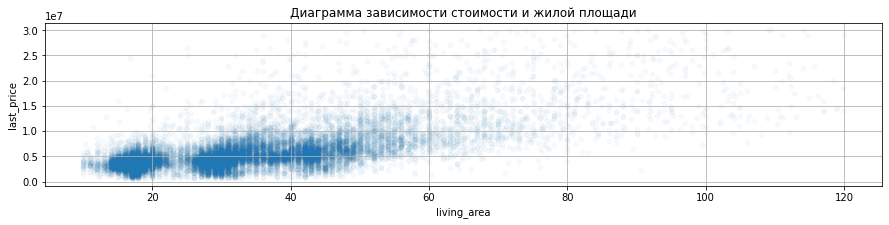

In [650]:
# Построим диаграмму рассеяния зависимости стоимости и жилой площади

good_data.plot.scatter(
    title='Диаграмма зависимости стоимости и жилой площади',
    x='living_area',
    y='last_price',
    alpha=0.03,
    grid=True,
    figsize=(15,3),
);

In [651]:
# Коэффициент корреляции

good_data['living_area'].corr(good_data['last_price'])

0.6700712228326673

Зависимость стоимости и жилой площади положительная средняя, скорее линейная, но уже значительно меньшая, по сравнению с общей площадью.

##### Стоимость - Площадь кухни.

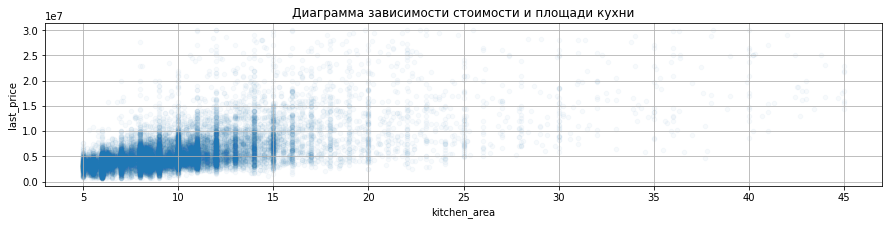

In [652]:
# График зависимости Стоимости от площади кухни

good_data.plot.scatter(
    title='Диаграмма зависимости стоимости и площади кухни',
    x='kitchen_area',
    y='last_price',
    alpha=0.03,
    grid=True,
    figsize=(15,3),
);

In [653]:
# Коэффициент корреляции

good_data['kitchen_area'].corr(good_data['last_price'])

0.6091801366656481

В данном случае степень зависимости показателй продолжает снижаться. 

##### Стоимость - Количество комнат.

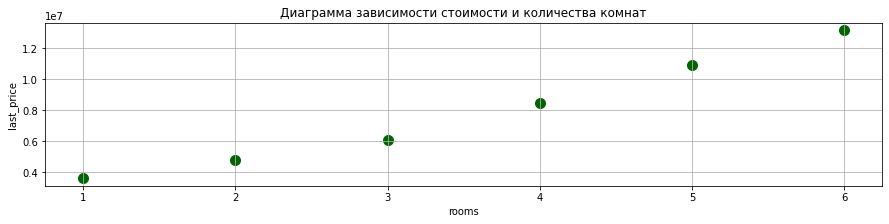

In [654]:
# Построим график взаимосвязи стоимости и количества комнат

good_data.pivot_table(
    index='rooms',
    values='last_price',
    aggfunc=('median')
).reset_index(
).plot.scatter(
    title='Диаграмма зависимости стоимости и количества комнат',
    x='rooms',
    y='last_price',
    grid=True,
    figsize=(15,3),
    s=100,
    c='darkgreen'
);

In [656]:
# Коэффициент корреляции

good_data['rooms'].corr(good_data['last_price'])

0.4800994831628981

График показывает, что чем больше комнат, тем выше цена. Зависимость еще менее линейная, чем в предыдущих пунктах, что и отражает коэффициент корреляции.

##### Стоимость - Категория этажа (Первый, последний, другой).

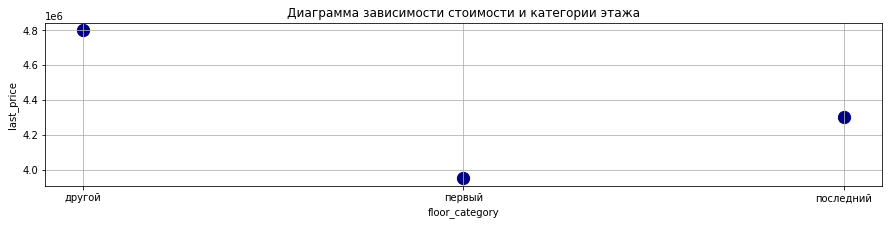

In [657]:
# График зависимости Стоимости от категории этажа

good_data.query('floor_category != "Некорректное значение"'
).pivot_table(
    index='floor_category',
    values='last_price',
    aggfunc=('median')
).reset_index(
).plot.scatter(
    title='Диаграмма зависимости стоимости и категории этажа',
    x='floor_category',
    y='last_price',
    grid=True,
    figsize=(15,3),
    s=150,
    c='navy'
);

Наименьшую стоимость имеют объекты, расположенные на первом этаже, немного выше стоимость объектов на последнем этаже, и наибольшую стоимость имеют объекты, расположенные на других этажах.

Коэффициент корреляции по категориальным данным нельзя построить.

##### Стоимость - Дата размещения (день, месяц, год).

In [658]:
# Уберу 2014 год, тк он не показательный, и данные не понятные

good_data = good_data.query('year_exposition_num != 2014')

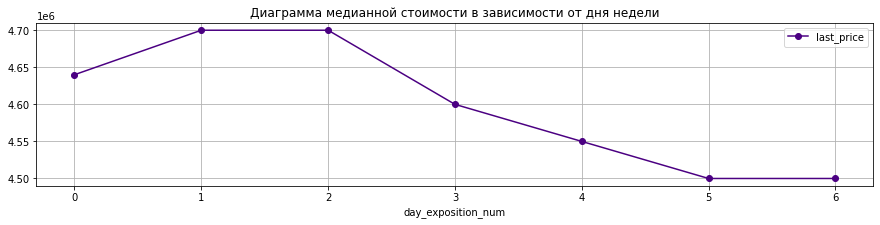

In [659]:
# График зависимости Медианной Стоимости от Дня недели размещения объявления

good_data.pivot_table(
    index='day_exposition_num',
    values='last_price',
    aggfunc=('median')
).reset_index(
).plot(
    title='Диаграмма медианной стоимости в зависимости от дня недели',
    x='day_exposition_num',
    y='last_price',
    style="o-",
    grid=True,
    figsize=(15,3),
    c='indigo'
);

По медианной стоимости вывод будет такой:
Максимум стоимости - во вт и ср, минимум в выходные. со среды до сб снижается, а пн стоимость растет.

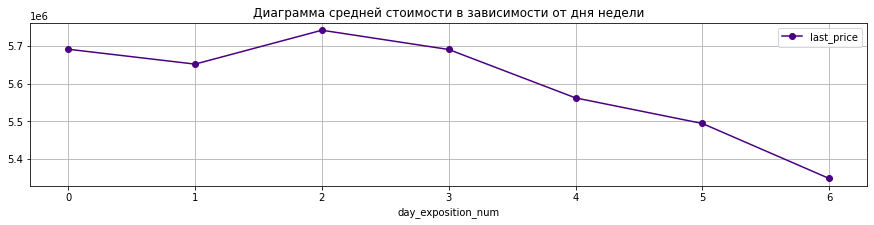

In [660]:
# График зависимости Срденей Стоимости от Дня недели размещения объявления

good_data.pivot_table(
    index='day_exposition_num',
    values='last_price',
    aggfunc=('mean')
).reset_index(
).plot(
    title='Диаграмма средней стоимости в зависимости от дня недели',
    x='day_exposition_num',
    y='last_price',
    style="o-",
    grid=True,
    figsize=(15,3),
    c='indigo'
);

По средней стоимости вывод: Максимум стоимости приходится на СР, чуть ниже показатели ПН и ЧТ, затем ВТ, затем ПТ, СБ и минимум  в ВС. 

В целом наблюдается активность в течение рабочей недели, с пиком в Среду, которая снижается к выходным, достигая минимума в вс. 

Мне кажется лучше брать медианную стоимость, она будет отражать больще зависимость именно от показателя стоимости. Срденяя стоимость будет зависеть и от количества объявлений и от разных уникальных объектов ( как минимальных, так и максимальных по цене - слишком выдающихся).

Можно посмотреть показатели количества объявлений по дням:

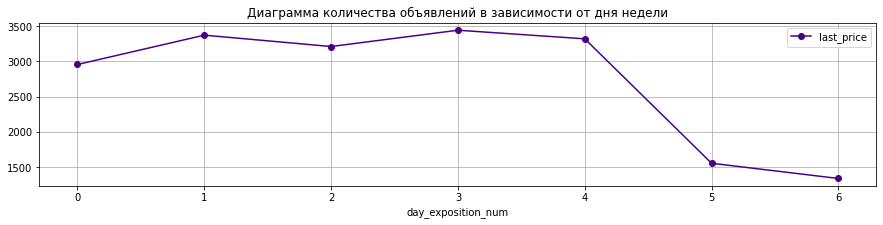

In [661]:
good_data.pivot_table(
    index='day_exposition_num',
    values='last_price',
    aggfunc=('count')
).reset_index(
).plot(
    title='Диаграмма количества объявлений в зависимости от дня недели',
    x='day_exposition_num',
    y='last_price',
    style="o-",
    grid=True,
    figsize=(15,3),
    c='indigo'
);

Ближе к концу недели выставляют объекты по более высокой стоимости: в чт, пт и особенно в сб. В сб при небольшом количестве объявлений, средняя стоимость сильно выше медианной.

Пожалуй, по анлогичной схеме рассмотрим и дальше эти показатели.

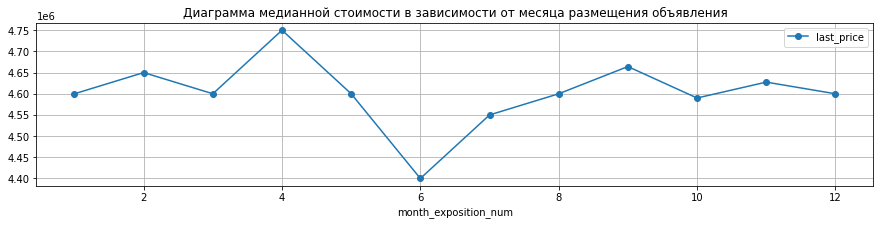

In [663]:
# График зависимости Стоимости от месяца размещения объявления
# Медианные значения цены

good_data.pivot_table(
    index='month_exposition_num',
    values='last_price',
    aggfunc=('median')
).reset_index(
).plot(
    title='Диаграмма медианной стоимости в зависимости от месяца размещения объявления',
    x='month_exposition_num',
    y='last_price',
    style="o-",
    grid=True,
    figsize=(15,3),
#    c='teal'
);

Максимум стоимости в апреле, минимум в июне. 2й экстремум - сентябрь и февраль, чуть ниже - ноябрь. Примерно одинаковое среднее - январь, март, май, август, октябрь, декабрь. Июль на пути от минимума к среднему.

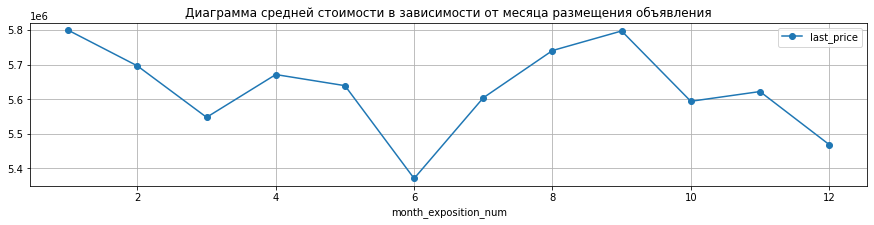

In [664]:
# График зависимости Стоимости от месяца размещения объявления
# Средние значения цены

good_data.pivot_table(
    index='month_exposition_num',
    values='last_price',
    aggfunc=('mean')
).reset_index(
).plot(
    title='Диаграмма средней стоимости в зависимости от месяца размещения объявления',
    x='month_exposition_num',
    y='last_price',
    style="o-",
    grid=True,
    figsize=(15,3),
#    c='teal'
);

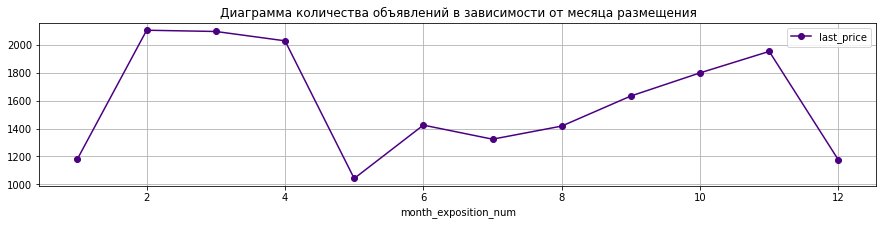

In [665]:
good_data.pivot_table(
    index='month_exposition_num',
    values='last_price',
    aggfunc=('count')
).reset_index(
).plot(
    title='Диаграмма количества объявлений в зависимости от месяца размещения',
    x='month_exposition_num',
    y='last_price',
    style="o-",
    grid=True,
    figsize=(15,3),
    c='indigo'
);

Если я правильные делаю выводы ))

То вывод будет такой: наименьшее число объявлений выставляют в мае, также в январе и декабре. Приэтом в эти месяцы квартиры выставляют по намного более высокой стоимости. В июне получается выставляют довольно среднее число объявлений, но по гораздо меньшей стоимости. 

In [666]:
# Это если взять выборку без нулей по дням:

# Получается, что максимальная стоимость в Сентябре, чуть ниже в Феврале и Ноябре, а минимальная в июне. В Марте-Апреле-Мае и Октябре примерно на одном среднем уровне. Чуть выше минимально в Июле и Декабре.

При расчете по годам вспомним про аномалию 2016 года во 2м полугодиии, апрель - май 2017, апрель-май 2018

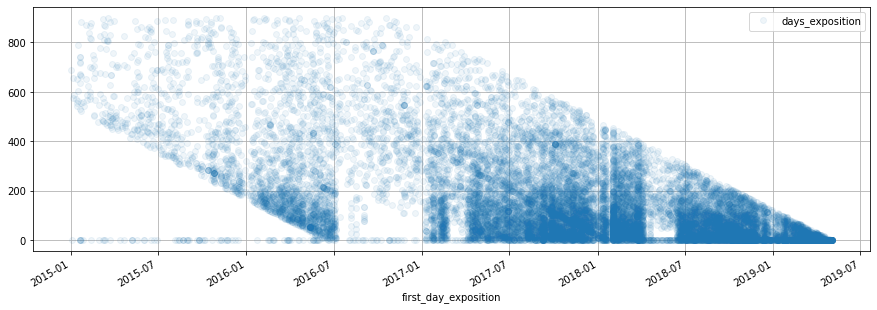

In [667]:
good_data.plot(
    x='first_day_exposition', 
    y='days_exposition', 
    style='o',
    alpha=0.07,
    grid=True,
    figsize=(15,5)
);

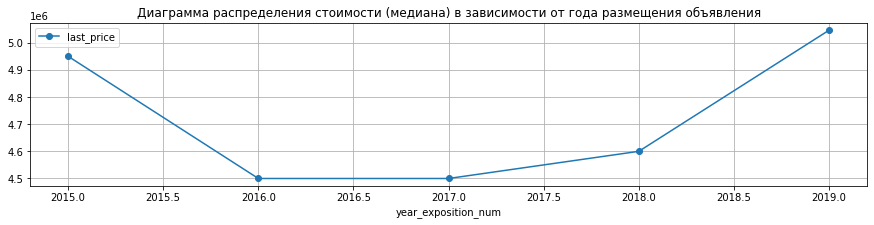

In [668]:
# График зависимости Стоимости от месяца размещения объявления
# Медианные значения цены

good_data.pivot_table(
    index='year_exposition_num',
    values='last_price',
    aggfunc=('median')
).reset_index(
).plot(
    title='Диаграмма распределения стоимости (медиана) в зависимости от года размещения объявления',
    x='year_exposition_num',
    y='last_price',
    style="o-",
    grid=True,
    figsize=(15,3),
#    c='cyan'
);

Рассмотрим также средние показатели стоимости, количества объектов и общей площади по годам

In [669]:
# Создадим сводную таблицу с рассчетом средних значений цены и общей площади и количества объектов

year_parameters = good_data.pivot_table(
    index='year_exposition_num', 
    values=['last_price', 'total_area', 'index'], 
    aggfunc=({'last_price':'mean', 'total_area':'mean', 'index':'count'})
).rename(
    columns={'index':'object_count', 'last_price': 'last_price_mean', 'total_area': 'total_area_mean'}
).reset_index()

In [670]:
year_parameters

year_exposition_num  object_count  last_price_mean  total_area_mean
0                 2015           812          6055451               62
1                 2016          2314          5643864               59
2                 2017          6812          5539079               57
3                 2018          6788          5539437               56
4                 2019          2462          5982665               57

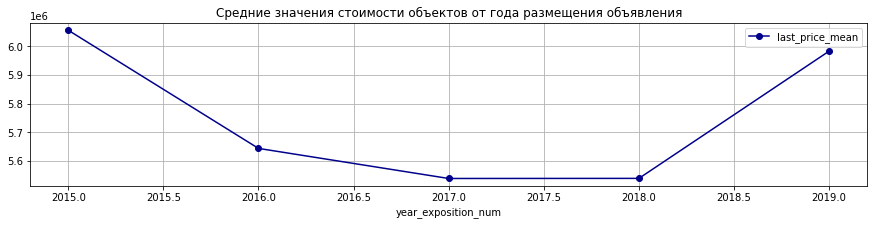

In [671]:
year_parameters.plot(
    title='Средние значения стоимости объектов от года размещения объявления',
    x='year_exposition_num',
    y='last_price_mean',
    style="o-",
    grid=True,
    figsize=(15,3),
    c='darkblue'
);

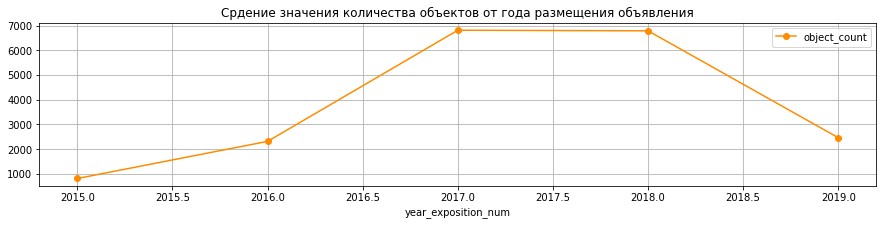

In [672]:
year_parameters.plot(
    title='Срдение значения количества объектов от года размещения объявления',
    x='year_exposition_num',
    y='object_count',
    style="o-",
    grid=True,
    figsize=(15,3),
    c='darkorange'
);

Количество объектов минимально в 2015г, растет в 2016, достигает максимума в 2017 и 2018 гг, и затем в 2019 снижается до величины чуть выше показателей 2016г.

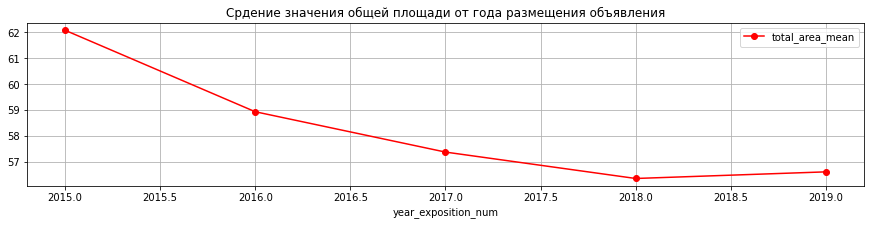

In [673]:
year_parameters.plot(
    title='Срдение значения общей площади от года размещения объявления',
    x='year_exposition_num',
    y='total_area_mean',
    style="o-",
    grid=True,
    figsize=(15,3),
    c='red'
);

При этом общая площадь объектов недвижимости снижается на протяжении 2015 - 2018 гг, в 2019 - чуть выше миниммальной

In [674]:
# Добавим в сводную таблицу колонку со средней стоимостью объекта недвижимости по годам.
# и среднюю цену 1 кв.м.

year_parameters['avg_object_price'] = year_parameters['last_price_mean'] / year_parameters['object_count']
year_parameters['avg_object_price_per_sq_m'] = year_parameters['last_price_mean'] / year_parameters['total_area_mean']

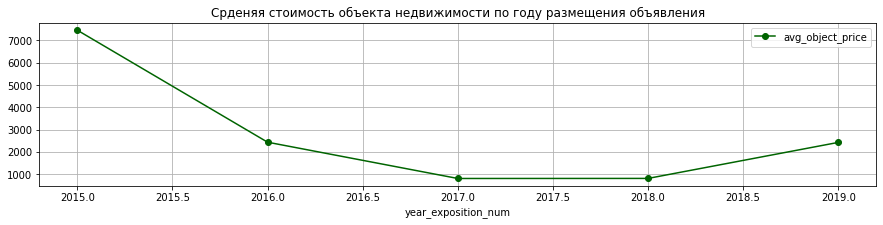

In [675]:
year_parameters.plot(
    title='Срденяя стоимость объекта недвижимости по году размещения объявления',
    x='year_exposition_num',
    y='avg_object_price',
    style="o-",
    grid=True,
    figsize=(15,3),
    c='darkgreen'
);

То средняя цена объекта недвижижмости снижается с 2015 до 2017, минимальна в 2017- 2018, и затем начинает расти. Учитывая, что при этом снижается площадь квартир, можно отметить рост цен на недвижимость с 2018 года, который усилился в 2019.

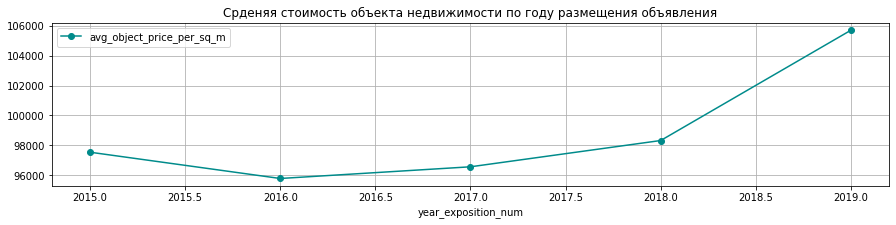

In [676]:
# И конечно, хочется посмтотреть на среднюю цену 1 кв.м. в связи со всем вышеперечисленным.
# потому что в целом по стоимости это не показательно

year_parameters.plot(
    title='Срденяя стоимость объекта недвижимости по году размещения объявления',
    x='year_exposition_num',
    y='avg_object_price_per_sq_m',
    style="o-",
    grid=True,
    figsize=(15,3),
    c='darkcyan'
);

И вот тут, мне кажется график более информативный. Средняя цена за кв м. недвижимости снижается в 2015 , достигая минмиума в 2016 г. В это время, как мы помним был общий кризис в экономике в целом и на рынке недвижимости в частности.
Начиная с 2017г цена 1 кв.м. начинает расти, темпы роста значительно увеличиваются в 2019г.
И здесь дена кв.м. достигает максимума, намного превышая значения 2015 года.

**Вывод:**

В данном шаге мы рассмотрели какие факторы влияют на Общую стоимость квартир. Построили графики зависимостей. Для количественных показателей рассчитали коэффициенты корреляции. 
Наибольшая положительная зависимость выявлена у Стоимости и Общей площади. Менее значима зависимость от жилой площади и площади кухни.

Стоимость комнатных объектов растет в зависимости от количества комнат - от 1 до 4-х, достигая максимума для 4-х комнатных квартир. Но Стоимость 5-ти комнатных квартир уже снижается. 

По этажности: минимальную стоимость имеют объекты на первых этажах, чуть выше - на последних, и максимальная стоимость у объектов на других этажах.

Интересно, что выявлена зависимость от дня недели размещения объявления: наибольшую стоимость имеют объекты, выставленные на продажу в ПН и СР, наименьшую - в ЧТ и ПТ.

В течение года, стоимость недвижимости максимальна в апреле, минимальна - в июне, чуть выше - в июле и октябре. В остальные месяцы стоимость в средних диапазонах, со снижением в феврале.

В рассмотренные годы с 2014 по 2015 наблюдался небольшой рост стоимости недвижимости. В 2016 году резкий спад, который усугубился в 2017. С 2018 года стоимость недвижимости начинает активно расти, и этот стремительный рост продолжается в 2019 году.

#### 10 локаций с наибольшим числом объявлений

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Для этого построим сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [677]:
top_10 = good_data.pivot_table(
    index='locality_name',
    values='price_1_sqm',
    aggfunc=('count', 'mean')
).sort_values(by='count', ascending=False).head(10)

display(top_10)

count   mean
locality_name                  
Санкт-Петербург    12782 109502
пгт Мурино           465  84901
поселок Шушары       374  78257
деревня Кудрово      365  94527
Всеволожск           335  68680
Пушкин               306 102760
Колпино              289  75559
поселок Парголово    274  90559
Гатчина              263  68702
Выборг               180  58298

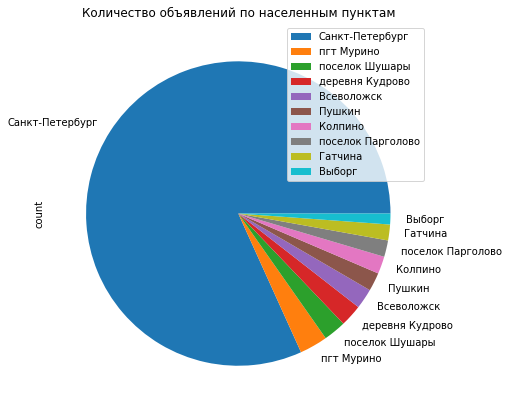

In [678]:
top_10.plot(
    title='Количество объявлений по населенным пунктам',
    y='count',
    kind='pie',
    figsize=(7,7));

Санкт-Петербург в нашей выборе крайне массивный объект по количеству объявлений.

In [679]:
# Выведем объекты с минимальной и максимальной стоимостью квартир из списка топ-10 по количеству объявлений

top_10[(top_10['mean'] == top_10['mean'].min())|(top_10['mean'] == top_10['mean'].max())]

count   mean
locality_name                
Санкт-Петербург  12782 109502
Выборг             180  58298

**Вывод:**

По количеству объявлений о продаже недвижимости лидирует Санкт-Петербург. 
Здесь же наибольшая цена объектов недвижимости - в среднем 107 тыс. руб/кв.м..
Минимальная цена за кв.м. из топ-10 локаций по количеству объявлений - в Выборге ~ 56 тыс. руб./кв.м.

#### Объекты в Санкт-Петербурге

In [680]:
# Сделаем выборку с объектами в Санкт-Петербурге

good_data_spb = good_data.query('locality_name == "Санкт-Петербург"')

In [681]:
# Посмотрим, все ли правильно отражается (тк у меня был сбой на этом этапе, таблица глючила )

good_data_spb.pivot_table(
    index='city_centers_km', values='last_price', aggfunc=('count','median'))

count  median
city_centers_km               
0                    7 7200000
1                  113 9555000
2                  167 9000000
3                  232 8000000
4                  484 8400000
5                  639 8700000
6                  421 8000000
7                  318 6999500
8                  487 7300000
9                  485 5290000
10                 619 5000000
11                1005 5000000
12                1407 5000000
13                1263 5250000
14                1097 4880000
15                1366 4900000
16                1082 4700000
17                 752 4600000
18                 218 4295000
19                 134 4525000
20                  15 4750000
21                  94 5254738
22                 172 4950000
23                  71 4400000
24                  21 3350000
25                  17 4070000
26                  38 3445666
27                   2 8300000
28                   7 4990000
29                   3 4700000

Поскольку на 0м км у нас всего 7 объектов, и стоимсоть не очень показательна, мы не будем брать их в рассмотрение.

Полагаю, что в данном случае лучше взять медианную стоимость. К этому моменту данные в выборке по СПб уже очищены от выбросов. Но показатели медианы четче отражают перепады.

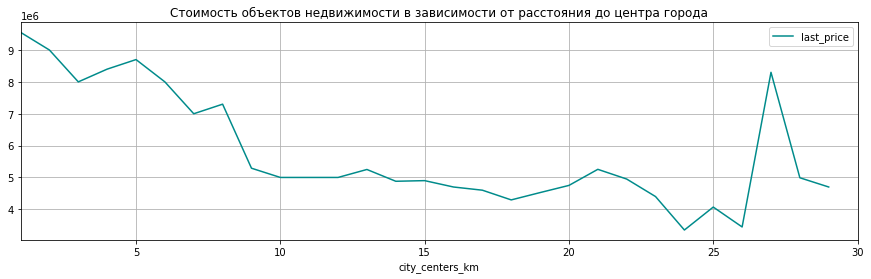

In [682]:
good_data_spb.pivot_table(
    index='city_centers_km', values='last_price', aggfunc=('median')
).plot( 
    title='Стоимость объектов недвижимости в зависимости от расстояния до центра города',
    xlim=(1,30),
    style="-",
    grid=True,
    figsize=(15,4),
    c='darkcyan'
);

Из графика видно границу центральной части СПб - до 9 км.
Стоимость объектов в самом центре города максимальна - около 10 млн.
Есть 2 области с провалами в стоимости: 3й км (8 млн) и 7й км (7млн), затем 9й - граница центра, где цена стабилизируется на среднем уровне около 5 -5,2 млн. руб. с небольшим повышением в 13 км (5,2 млн.).
И помима экстремума в 1м км, есть пики на 5м км (8,7 млн) и 8м км (7,3 млн.).

Далее стоимость объектов относительно стабильна до 18 км от центра города (здесь небольшое снижение до 4,5 млн.).
На 21м км локальный пик стоимости (5,2 млн.), затем снижение до минимума на 24 и 26 км (2,5 млн.), с повышение в 25м км (4млн.). 
Резкий рост стоимости на 27м км. до уровня центра - 8,3млн. - и потом такое же резкое снижение до обычных загородных значений (5 млн.) на 28 и далее.

In [683]:
# Посмотрим, что у нас на 27 км.

good_data_spb.query('city_centers_km == 27')

index  total_images  last_price  total_area first_day_exposition  rooms  \
725     748            13    14350000          74           2017-11-28      2   
5788   5961             6     2250000          32           2018-02-27      1   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
725                3             5           30      3          NaN   False   
5788               3             2           16      2          NaN   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
725       False            25        0  Санкт-Петербург             23888   
5788      False             7        0  Санкт-Петербург             24006   

      city_centers_nearest  parks_around_3000  parks_nearest  \
725                  27313                  1           1496   
5788                 27431                  0            NaN   

      ponds_around_3000  ponds_nearest  days_exposition  price_1_sqm  \
725                   0            NaN              128       193919   
5788                  0            NaN              178        70312   

      day_exposition_num  month_exposition_num  year_exposition_num  \
725                    1                    11                 2017   
5788                   1                     2                 2018   

     floor_category  city_centers_km  too_fast  too_slow  
725          другой               27     False     False  
5788      последний               27     False     False

Один объект, который так сильно влияет на график.

Стоит посмотреть количество именно внутри СПб-выборки

In [684]:
# сделаем сводную таблицу количества объектов по км

good_data_spb_count = good_data_spb.pivot_table(
    index='city_centers_km',
    values='last_price',
    aggfunc=('count')
).rename(
    columns={'last_price':'object_count'}
)

In [685]:
# Посчитаем сколько % занимает каждое значение в общем количестве

good_data_spb_count['count_rate'] = ((good_data_spb_count['object_count'] / good_data_spb_count['object_count'].sum())*100)

In [686]:
good_data_spb_count

object_count  count_rate
city_centers_km                          
0                           7           0
1                         113           1
2                         167           1
3                         232           2
4                         484           4
5                         639           5
6                         421           3
7                         318           2
8                         487           4
9                         485           4
10                        619           5
11                       1005           8
12                       1407          11
13                       1263          10
14                       1097           9
15                       1366          11
16                       1082           8
17                        752           6
18                        218           2
19                        134           1
20                         15           0
21                         94           1
22                        172           1
23                         71           1
24                         21           0
25                         17           0
26                         38           0
27                          2           0
28                          7           0
29                          3           0

Стоит убрать значения, которые составляют менее 1 %

In [687]:
# Выберем в список все элементы, где доля объектов в общем количестве в СПб меньше 1%

count_rate_zero = good_data_spb_count.query('count_rate < 1')

In [688]:
count_rate_zero

object_count  count_rate
city_centers_km                          
0                           7           0
1                         113           1
20                         15           0
21                         94           1
23                         71           1
24                         21           0
25                         17           0
26                         38           0
27                          2           0
28                          7           0
29                          3           0

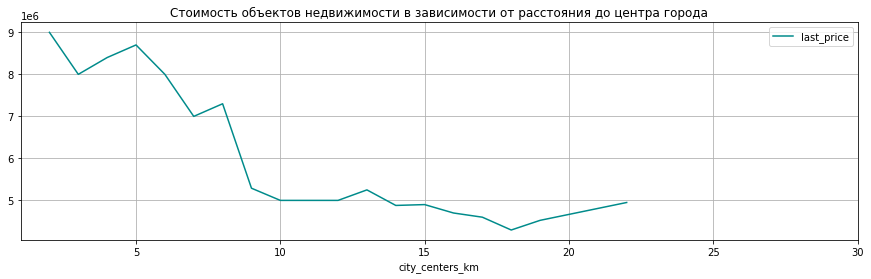

In [689]:
# Исключив эти объекты, построим новый график стоимости

good_data_spb.query(
    'city_centers_km not in @count_rate_zero.index'
).pivot_table(
    index='city_centers_km', values='last_price', aggfunc=('median')
).plot( 
    title='Стоимость объектов недвижимости в зависимости от расстояния до центра города',
    xlim=(1,30),
    style="-",
    grid=True,
    figsize=(15,4),
    c='darkcyan'
);

Теперь выбросов на графике нет, остались в центре города провалы на 3м и 7м км.

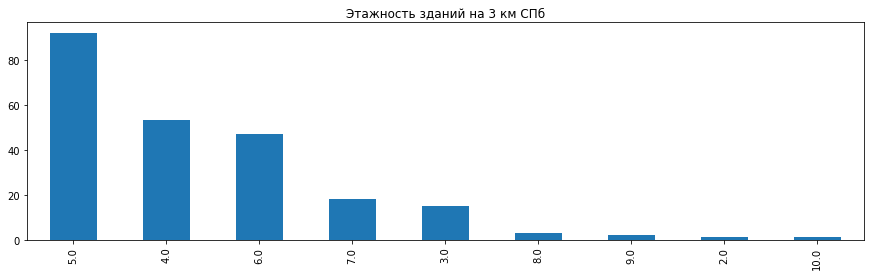

In [690]:
# Посмотрим, какие объекты на 3м км. (провал на графике)

good_data_spb.query(
    'city_centers_km not in @count_rate_zero.index and city_centers_km == 3'
)['floors_total'].value_counts().plot(title='Этажность зданий на 3 км СПб', y='count', kind='bar', figsize=(15,4));

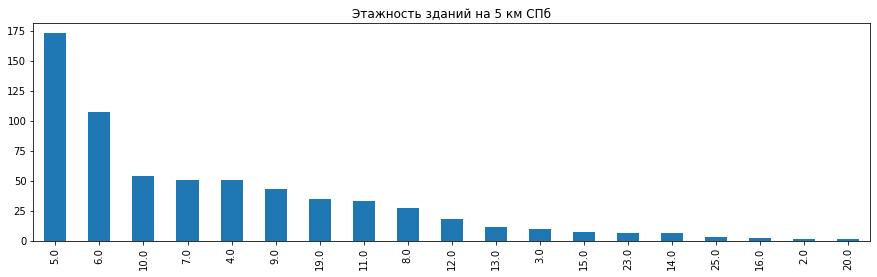

In [691]:
# Посмотрим, какие объекты на 5м км. (пик на графике)

good_data_spb.query(
    'city_centers_km not in @count_rate_zero.index and city_centers_km == 5'
)['floors_total'].value_counts().plot(title='Этажность зданий на 5 км СПб', y='count', kind='bar', figsize=(15,4));

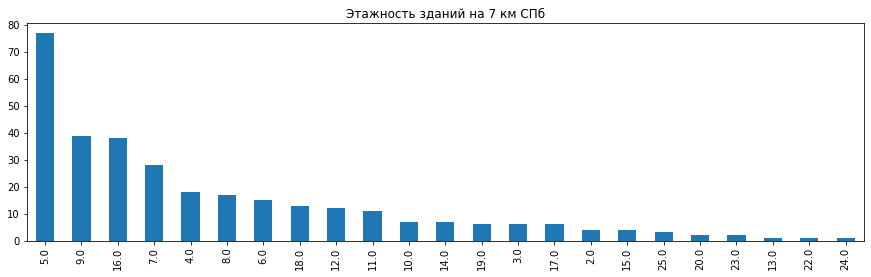

In [692]:
# Посмотрим, какие объекты на 7м км. (провал на графике)

good_data_spb.query(
    'city_centers_km not in @count_rate_zero.index and city_centers_km == 7'
)['floors_total'].value_counts().plot(title='Этажность зданий на 7 км СПб', y='count', kind='bar', figsize=(15,4));

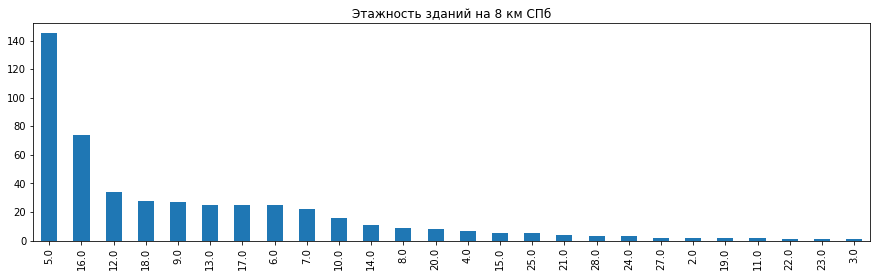

In [693]:
# Посмотрим, какие объекты на 8м км. (пик на графике)

good_data_spb.query(
    'city_centers_km not in @count_rate_zero.index and city_centers_km == 8'
)['floors_total'].value_counts().plot(title='Этажность зданий на 8 км СПб', y='count', kind='bar', figsize=(15,4));

Вероятно, провалы связаны с преобладанием объектов нежилой недвижимости в этих областях и в основном старых объектов: 5ти этажки - основная часть зданий. На 5м км. появляются здания до 19 этажей и единичные от 20 до 23 этажей. на 7 км больше зданий от 20 до 25 этажей и на 8м до 27 этажей (но этажность не сильно объясняет провалы).

In [694]:
# Посмотрим, что у нас на 21 км.

good_data_spb.query(
    'city_centers_km not in @count_rate_zero.index and city_centers_km > 20'
)

index  total_images  last_price  total_area first_day_exposition  \
318      324             0     6090000          62           2015-09-06   
417      427             1     3400000          39           2018-01-10   
481      494            15     5100000          60           2017-05-12   
492      505            19     4500000          58           2017-04-24   
597      616            18    15000000         187           2019-01-28   
...      ...           ...         ...         ...                  ...   
22534  23291            14     7500000         109           2018-02-12   
22553  23311             4     5490000          59           2019-03-28   
22713  23474            16     5900000          40           2019-03-16   
22743  23504            20     4800000          42           2017-04-18   
22769  23532             7     8200000          74           2019-03-13   

       rooms  ceiling_height  floors_total  living_area  floor is_apartment  \
318        2               3            28           30     22          NaN   
417        1               3            12           16      3          NaN   
481        2               3            18           30     10          NaN   
492        2               3            16           31      2          NaN   
597        5               3            16          112      1          NaN   
...      ...             ...           ...          ...    ...          ...   
22534      3               3            17           62      8          NaN   
22553      2               3            10           37      8          NaN   
22713      2               3            17           31     16          NaN   
22743      1               3            26           16     21        False   
22769      2               3            24           36     11          NaN   

       studio  open_plan  kitchen_area  balcony    locality_name  \
318     False      False            10        1  Санкт-Петербург   
417     False      False            10        0  Санкт-Петербург   
481     False      False            14        1  Санкт-Петербург   
492     False      False            10        1  Санкт-Петербург   
597     False      False            16        0  Санкт-Петербург   
...       ...        ...           ...      ...              ...   
22534   False      False            14        3  Санкт-Петербург   
22553   False      False            13        2  Санкт-Петербург   
22713   False      False             5        4  Санкт-Петербург   
22743   False      False            11        2  Санкт-Петербург   
22769   False      False            12        0  Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around_3000  \
318               19971                 21683                  0   
417               19826                 21538                  0   
481               42534                 21823                  0   
492               18867                 22291                  0   
597               19891                 21603                  0   
...                 ...                   ...                ...   
22534             18551                 21976                  0   
22553             18585                 22010                  0   
22713             19901                 21613                  0   
22743             20028                 21740                  0   
22769             20028                 21740                  0   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
318              NaN                  1            546              323   
417              NaN                  1            667               12   
481              NaN                  0            NaN              277   
492              NaN                  1            733              402   
597              NaN                  1            853                0   
...              ...                ...            ...              ...  

Возможно спальные районы тут ? Этажность высокая.

In [695]:
# Сделаем сводную таблицу с медианным значением стоимости квартир на каждый километр

last_price_per_km = good_data_spb.query(
    'city_centers_km not in @count_rate_zero.index'
).pivot_table(
    index=['city_centers_km'], values='last_price', aggfunc='median'
)

In [696]:
# И сводную таблицу с количеством объектов на каждый километр

objects_count_per_km = good_data_spb.query(
    'city_centers_km not in @count_rate_zero.index'
).pivot_table(
    index=['city_centers_km'], values='locality_name', aggfunc='count'
)

In [697]:
# Объединим 2 сводные таблицы и переименуем столбец с количеством в object_count

price_and_objects_per_km = last_price_per_km.merge(
    objects_count_per_km, on='city_centers_km'
).reset_index(
).rename(
    columns={'locality_name':'object_count'}
)

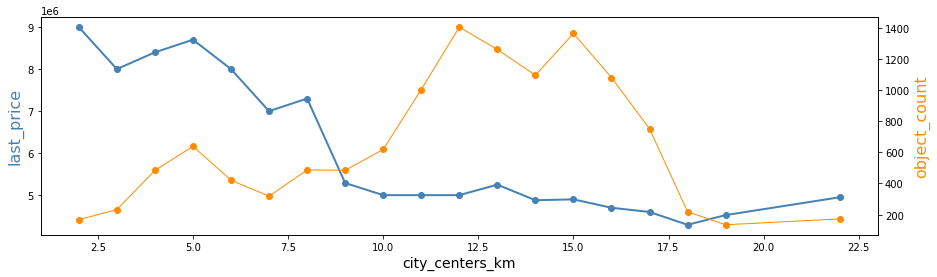

In [698]:
# Сотворим график c 2-мя параметрами по оси Y

fig,ax = plt.subplots(figsize=(15,4))
ax.plot(price_and_objects_per_km.city_centers_km , price_and_objects_per_km.last_price , color='steelblue', marker='o', linewidth=2)
ax.set_xlabel('city_centers_km', fontsize= 14 )
ax.set_ylabel('last_price', color='steelblue', fontsize= 16 )
ax2 = ax.twinx ()
ax2.plot(price_and_objects_per_km.city_centers_km , price_and_objects_per_km.object_count , color='darkorange', marker='o', linewidth=1)
ax2.set_ylabel('object_count', color='darkorange', fontsize= 16 );

Количество объектов на 3м и 7м км минимальное в центральной части, видимо, отсюда и провалы.
А начиная с 9 км резко падает стоимость, хотя здесь основная масса объектов недвижимости. После 17 км и количество объектов невелико и стоимость их.

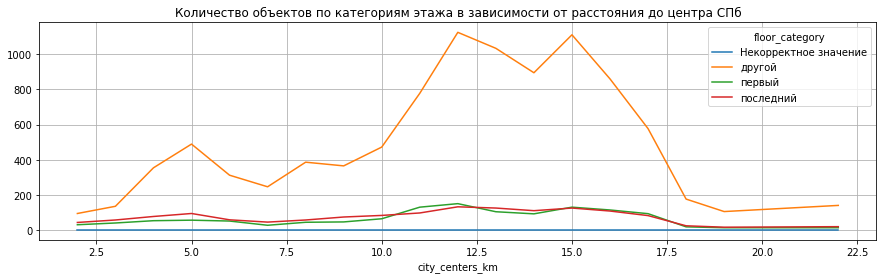

In [699]:
# А если посмотреть график по стоимости объектов в зависимости от категории этажа с распределением по км от центра, то будет вот что:

good_data_spb.query(
    'city_centers_km not in @count_rate_zero.index and floor_category != "Некорректное значение"'
).pivot_table(
    index='city_centers_km', values='last_price', columns='floor_category', aggfunc=('count')
).plot(
    title='Количество объектов по категориям этажа в зависимости от расстояния до центра СПб',
    grid=True,
    figsize=(15,4));


Очень похоже, что природа пиков и провалов определяется категорией этажа : на 5м и 8м км количество "других" этажей намного выше, чем первого и последнего, а на 3 и 7м сильно снижается. 
В области от 10 до 18 км количество многоэтажных домов намного превосходит центральную часть, естественно и число "других" этажей несравнимо больше (подавляющее количество), при том, что число первых и последних повышается не сильно. Получается, что на характер графика сильно влияет этажность застройки территории.

**Вывод:**

Центральная часть города - область до 9 км. Здесь максимальная стоимость ндвижимости - в среденем около 9 млн. руб.  с провалами в 3м км (~ 8 млн.) и 7м км (~ 7 млн.) и локальными пиками в 5 (~ 8.8 млн.) и 8 км. (~ 7.5 млн.)

После 10го км до 15го цена стабилизируется на среднем уровне около 5 млн.руб. с локальным пиком в 13 км от центра (~ 5,2 млн.), достигает минимума на 18м км (~ 2,5 млн.руб) и возвращается к средним 5 млн. к 21му км.

Харатер графика в большей степени определяется этажностью зданий: на 3 и 7м км намного больше первых и последних этажей. на 5м и 8м км значительно возрастает количество других этажей (те появляется больше объектов большей этажности, нежели 5ти этажки). Основное число объектов , подавляющее количество которых на других этажах - находится в пределах 10-18 км. 

### Общий вывод

Анализ рынка недвижимости Санкт-Петербурга и Ленинградской области привел нас к следующим итогам.

Определена зависимость рыночной стоимости квартир от заявленных параметров.

Основные факторы, влияющие на стоимость: 
* Расстояние до центра города - решающий фактор влияния на стоимость недвижимости
* Этаж объекта недвижимости: минимальная стимость - 1й этаж, чуть выше - последний этаж, стоимость других этажей намного выше
* Общая площадь, в меньшей степени жилая площадь и площадь кухни - зависимость средняя и выше средней
* Количество комнат: стоимость растет от 1 до 4-х комнат, затем начинает снижаться

Определены зависимости стоимости от :
* Дня размещения объявления: максимальная стоимость в СР, минимальная - в ВС. Основная масса объявлений размещается в течение рабочей недели, крайне мало - в выходные дни.
* Периода года: Объекты с максимальной стоимостью размещаются в январе и декабре, хотя количество их не велико. В июне размещают объекты по самой низкой стоимости. Наибольшее количество объявлений размещают в феврале и ноябре.
* по годам: с 2015 г стоимость объектов невижимости снижается до минимума в 2017-2018гг. Вместе с тем снижается и общая площадь объектов. При том, что число объявлений растет, достигая максимума в 2017-2018гг. С 2018 по 2019 гг. число объектов недвижимости сокращается, а площадь слабо растет, а стоимость увеличивается более высокими темпами.

Если рассматривать цену 1 кв.м., то наблюдается небольшой спад с 2015 до минимума в 2016г., затем небольшой рост в 2017 и более стремительный рост в 2018 до максимума в 2019гг.

Топ-10 по количеству объектов на рынке составляют Санкт-Петербуг и крупные близлежащие города. Наибольшая цена квартир - в Санкт-Петербурге, наименьшая в Выборге.

В Санкт-Петербурге отмечается крайне высокая зависимость стоимости квартир от расстояния до центра города в пределах 9 км, высокая - от 9 до 17 км, в пределах 17-23 км разброс цены минимальный. И определяющее влияние на распределение оказывает этажность застройки: если в самом центре - до 3 км  - это старые 5-ти этажки, то на 5км появляются дома большей этажности (и соотв. больше других жтажей , помимо первого и последнего). Основной объем предложения объектов недвижимости: 10-18 км, район с домами высокой этажности.